In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the excel sheet 
spare_part =pd.ExcelFile('Spare parts.xlsx')
print(spare_part.sheet_names)

['15-16- Raw Data', '12-13- Raw Data', 'Outline', 'statisical Output', ' Top 10', 'Forecast 1', 'Forecast 2', 'Interpretation']


In [3]:
# reading data of the spreadsheet 12-13
sheet2 = pd.read_excel(spare_part , sheet_name='12-13- Raw Data')
s2=pd.DataFrame(sheet2)
s2

,Material,Material Description,SLoc,Area,MvT,Doc_Date,Quantity,Amount LC
0,15,Plain Washer Din125 A10&5 A2,M4BH,Area1,261,2014-09-08,10.0,18.74
1,15,Plain Washer Din125 A10&5 A2,M1BH,Area1,261,2014-09-08,6.0,11.25
2,15,Plain Washer Din125 A10&5 A2,M2SH,Area1,261,2014-08-05,2.0,3.75
3,15,Plain Washer Din125 A10&5 A2,M4CV,Area2,261,2014-06-29,25.0,46.86
4,15,Plain Washer Din125 A10&5 A2,M1MH,Area1,261,2014-06-28,4.0,7.50
...,...,...,...,...,...,...,...,...
29972,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,261,2015-12-03,1.0,0.00
29973,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,262,2015-10-19,-1.0,0.00
29974,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4P3,Area2,262,2015-09-16,-1.0,0.00
29975,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,261,2015-09-11,1.0,0.00


In [4]:
#changing the colum names
s2.columns = ["Mcode" ,"M-Description" , "Loc" , "Area" , "MvT", "Dpt_date" , "Qty" , "Amt"]
s2

,Mcode,M-Description,Loc,Area,MvT,Dpt_date,Qty,Amt
0,15,Plain Washer Din125 A10&5 A2,M4BH,Area1,261,2014-09-08,10.0,18.74
1,15,Plain Washer Din125 A10&5 A2,M1BH,Area1,261,2014-09-08,6.0,11.25
2,15,Plain Washer Din125 A10&5 A2,M2SH,Area1,261,2014-08-05,2.0,3.75
3,15,Plain Washer Din125 A10&5 A2,M4CV,Area2,261,2014-06-29,25.0,46.86
4,15,Plain Washer Din125 A10&5 A2,M1MH,Area1,261,2014-06-28,4.0,7.50
...,...,...,...,...,...,...,...,...
29972,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,261,2015-12-03,1.0,0.00
29973,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,262,2015-10-19,-1.0,0.00
29974,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4P3,Area2,262,2015-09-16,-1.0,0.00
29975,N89042,"spare WEC trafo corru 950KVA,33/0.4KV",M4BH,Area1,261,2015-09-11,1.0,0.00


In [5]:
#dropping the unnecesary columns
s2.drop(["Amt", "MvT" ,"M-Description" ,"Area", "Loc"], axis = 1, inplace = True)
s2

,Mcode,Dpt_date,Qty
0,15,2014-09-08,10.0
1,15,2014-09-08,6.0
2,15,2014-08-05,2.0
3,15,2014-06-29,25.0
4,15,2014-06-28,4.0
...,...,...,...
29972,N89042,2015-12-03,1.0
29973,N89042,2015-10-19,-1.0
29974,N89042,2015-09-16,-1.0
29975,N89042,2015-09-11,1.0


In [6]:
#Checking for null values
print(s2['Dpt_date'].isna().sum())
print(s2['Qty'].isna().sum())
print(s2['Mcode'].isna().sum())
#s2.dtypes
s2.info()

0
0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29977 entries, 0 to 29976
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Mcode     29977 non-null  object        
 1   Dpt_date  29977 non-null  datetime64[ns]
 2   Qty       29977 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 702.7+ KB


In [7]:
#conveting the negative quant. to positive
s2['Qty'] = s2['Qty'].abs()
# s2

In [8]:
#finding unique material code
a1 = s2.Mcode.unique()
a1
print(a1.size)

1624


In [9]:
#finding the top 10 and bottom 10 materials
arr=[[0,0]]
for i in a1:
    val = s2.loc[(s2.Mcode == i),'Qty']
    arr.append([i , val.sum()]) 
df= pd.DataFrame(arr)
df.columns = ["Mcode" ,"qty"]
df = df.sort_values(by="qty", ascending = False)
df1=df.head(10)
#df1
bdf = df.tail(10)

#df1.to_excel('my_file.xlsx',sheet_name = 'top10')

In [10]:
daterange = pd.date_range('2013-09-01','2016-09-30', freq='MS')
daterange

DatetimeIndex(['2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [11]:
#month wise quantity of each material from sep 2014 to dec 2016


mat=[]
for i in df1["Mcode"]: 
    col=[]
    for mm_yy in daterange:
        val = s2.loc[(s2.Dpt_date.dt.month == mm_yy.month) & (s2.Dpt_date.dt.year == mm_yy.year) & (s2.Mcode == i )].Qty.sum()
        col.append(val)
    mat.append(col)
    val = 0


datenames = daterange.strftime("%Y-%b").tolist()
df2= pd.DataFrame(mat,columns=datenames)
df2.index = df1["Mcode"]
df2

,2013-Sep,2013-Oct,2013-Nov,2013-Dec,2014-Jan,2014-Feb,2014-Mar,2014-Apr,2014-May,2014-Jun,...,2015-Dec,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,2016-Aug,2016-Sep
Mcode,,,,,,,,,,,,,,,,,,,,,
25875,1000.0,1064.0,2687.0,0.0,400.0,225.00,2543.000,1039.0,337.0,6235.0,...,2402.00,30.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,600.0
89377,0.0,0.0,0.0,0.0,0.0,5.05,7755.275,2000.0,948.7,0.6,...,0.00,3.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
24828,1492.0,1250.0,1750.0,0.0,440.0,130.00,1365.000,1894.0,0.0,6414.0,...,1730.00,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,300.0
44546,323.0,1180.0,1481.0,0.0,350.0,130.00,486.000,1101.0,380.0,3014.0,...,3945.00,100.0,0.0,1000.0,300.0,1000.0,0.0,600.0,0.0,0.0
92862,0.0,0.0,0.0,0.0,0.0,2190.00,7787.000,1030.0,150.0,0.0,...,0.00,1328.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1431,0.0,0.0,0.0,0.0,0.0,14.00,577.000,729.0,906.0,916.0,...,914.00,311.0,58.0,366.0,7.0,687.0,677.0,322.0,583.0,328.0
20399,0.0,0.0,0.0,0.0,0.0,14.00,533.000,729.0,906.0,923.0,...,908.00,299.0,58.0,366.0,7.0,687.0,691.0,307.0,582.0,328.0
31256,1604.0,0.0,777.0,0.0,2296.0,0.00,350.000,350.0,302.0,1048.0,...,0.00,350.0,0.0,650.0,0.0,0.0,0.0,0.0,0.0,200.0
25873,1500.0,1025.0,2378.0,0.0,125.0,212.00,636.000,312.0,65.0,965.0,...,150.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


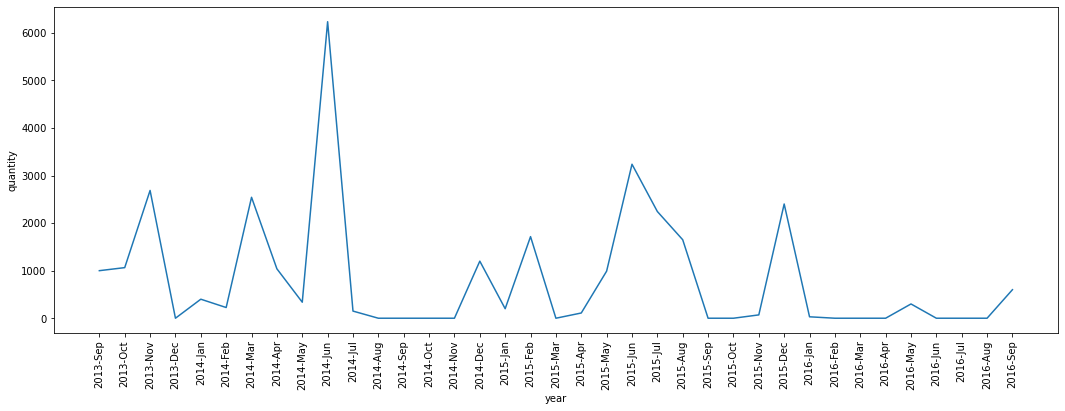

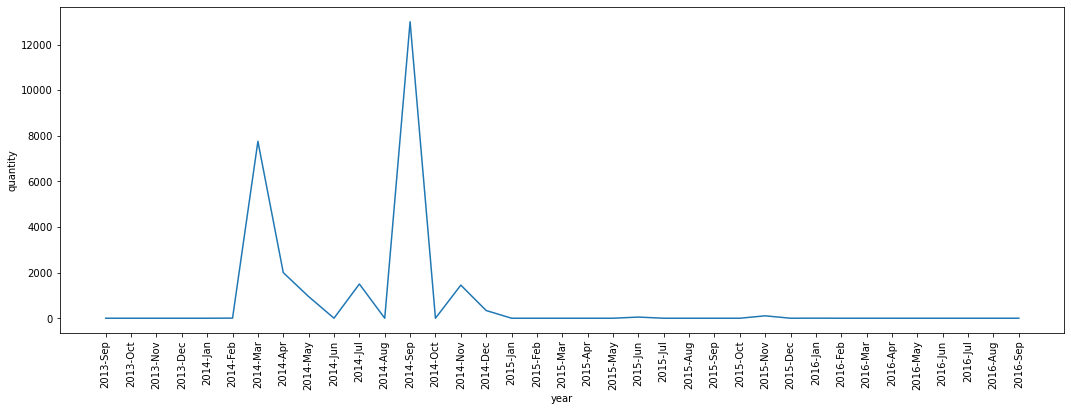

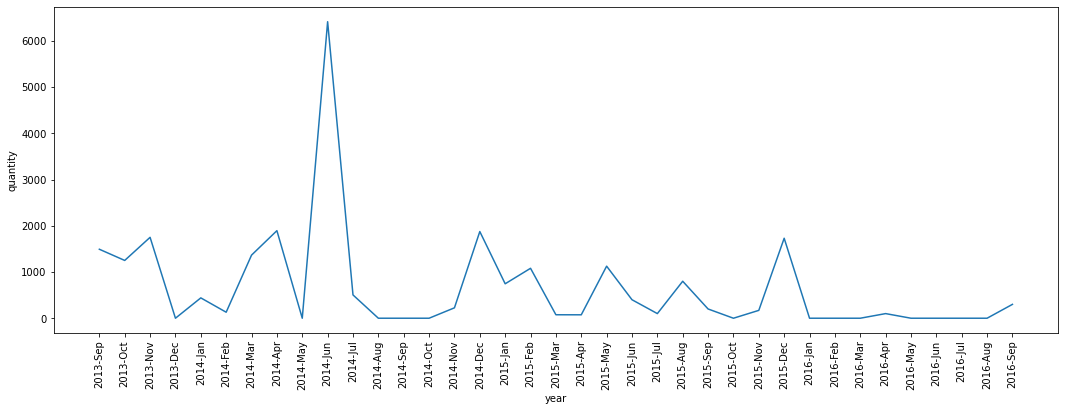

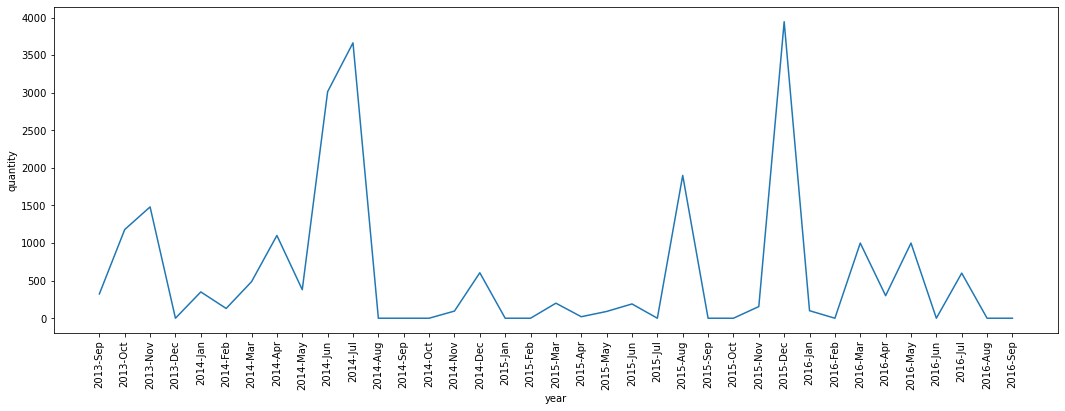

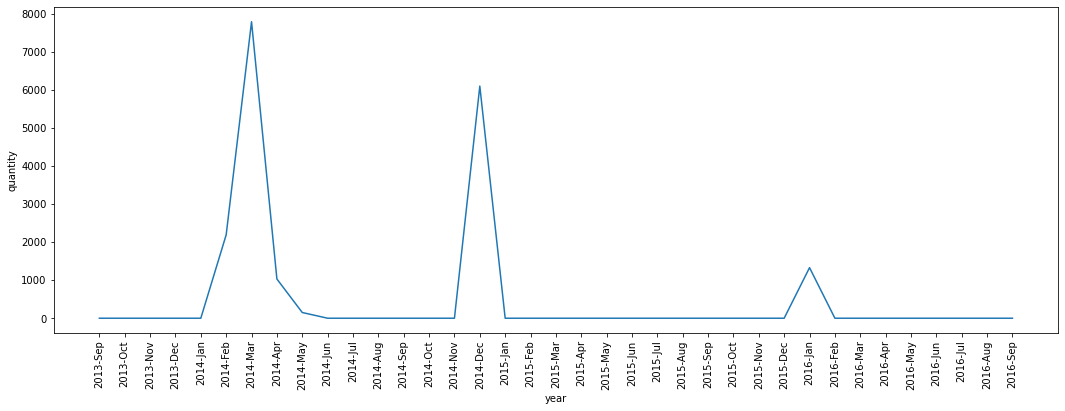

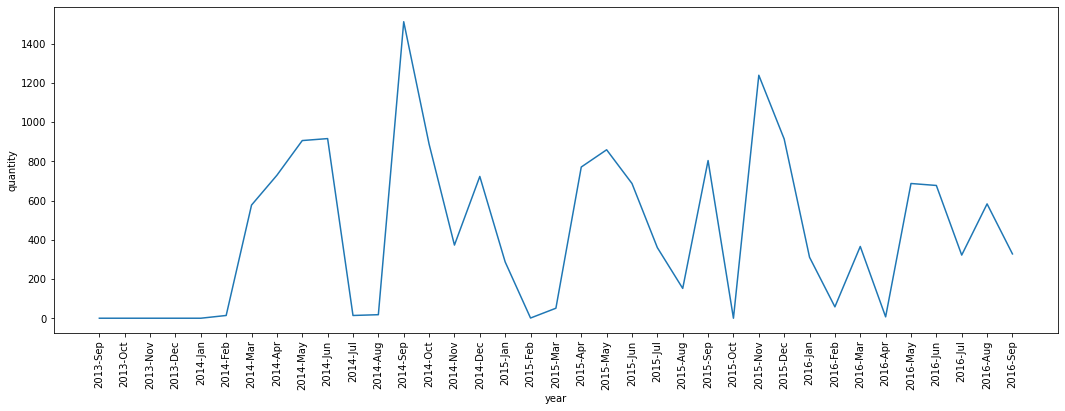

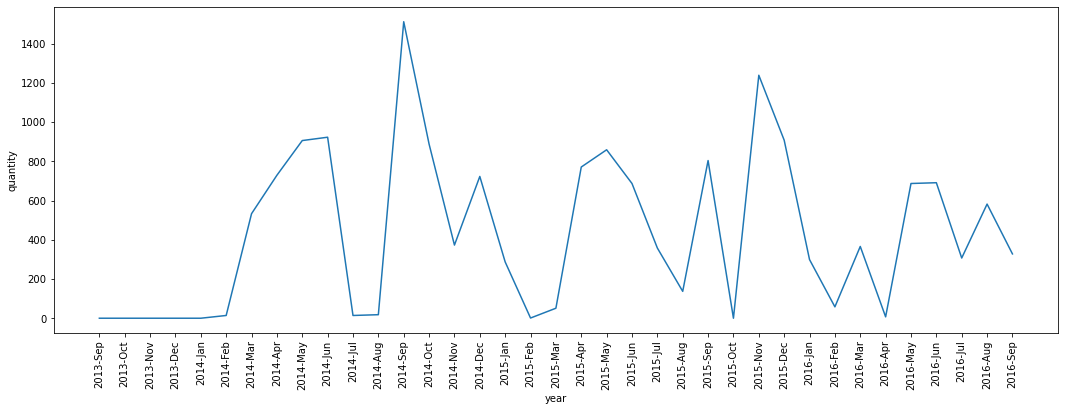

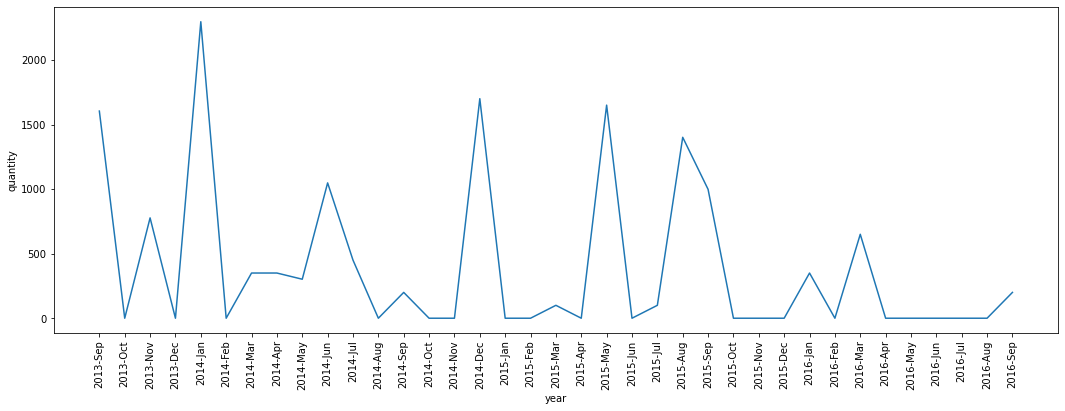

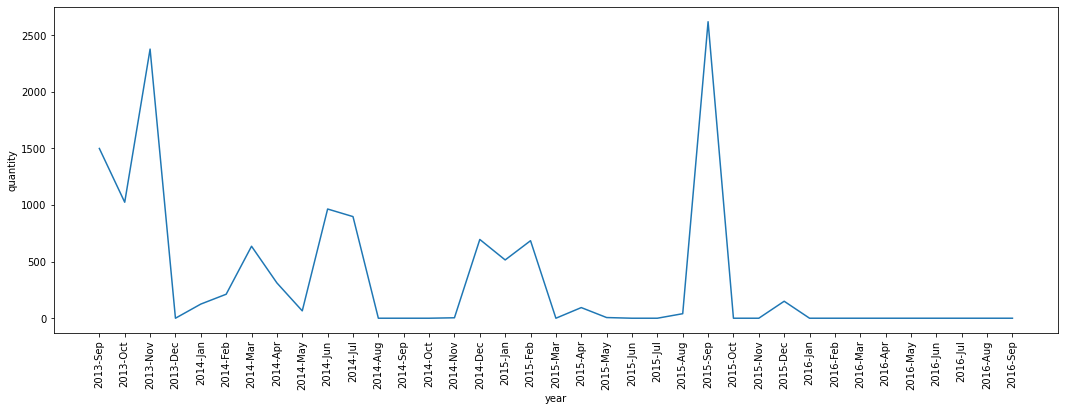

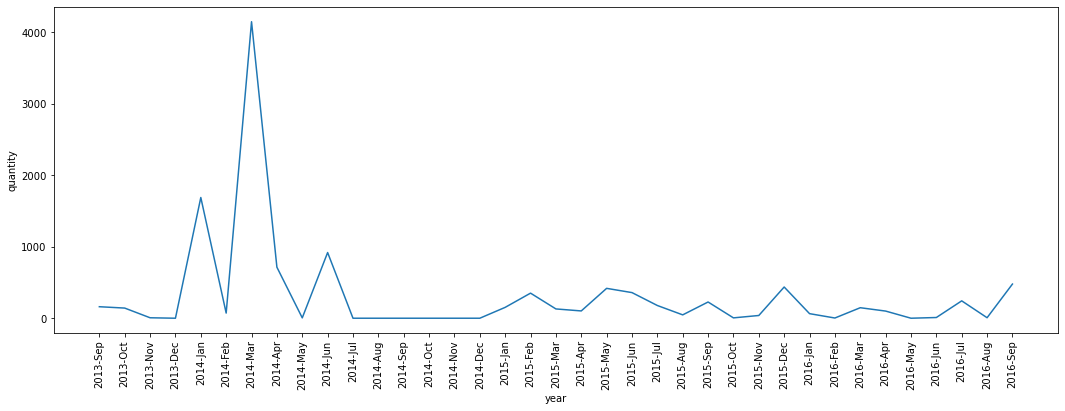

In [12]:
#plotting using matplotlib lib

for i in range(0,10):
    ndf = pd.DataFrame({'year':datenames,'quantity':df2.iloc[i].tolist()})
    ndf
   # plt.plot(x="year",y="quantity")  
    f = plt.figure()
    f.set_figwidth(18)
    f.set_figheight(6)
    plt.plot(ndf['year'],ndf['quantity'])
    plt.xticks(rotation=90)
    plt.xlabel('year')
    plt.ylabel('quantity')
    plt.show()

In [13]:
#trend,seasonality using statsmodel-seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose
#print(ndf)
#final.plot()
#writer = pd.ExcelWriter('str_top.xlsx',engine='xlsxwriter')
for i in range(0,10):
    ndf = pd.DataFrame({'year':datenames,'quantity':df2.iloc[i].tolist()})
    final = seasonal_decompose(ndf['quantity'],model='add',extrapolate_trend='freq',period=int(len(ndf)/2))
    #print(ndf)
    #final.plot()
    temp_trend = pd.DataFrame(final.trend)
    temp_seasonal = pd.DataFrame(final.seasonal)
    temp_resid = pd.DataFrame(final.resid)
    result = pd.concat([temp_trend, temp_seasonal,temp_resid], axis=1, join='inner')
    
    #result.to_excel(writer, sheet_name= str(df1['Mcode'].iloc[i])+('_str'), startrow=0 , startcol=0)
    #display(result)




#writer.save() 


D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MCode =  25875
MCode =  89377


D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


MCode =  24828
MCode =  44546


D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


MCode =  92862
MCode =  1431


D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


MCode =  20399
MCode =  31256


D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


MCode =  25873
MCode =  8421


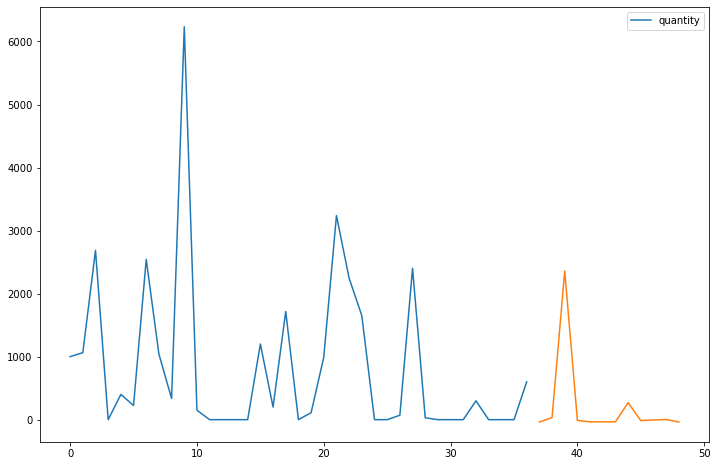

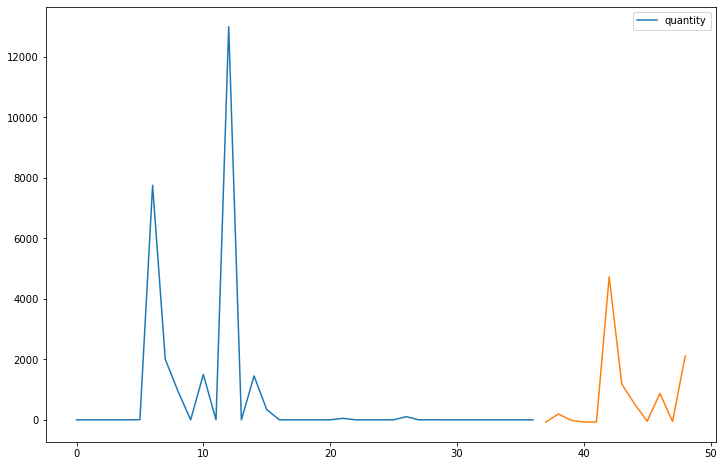

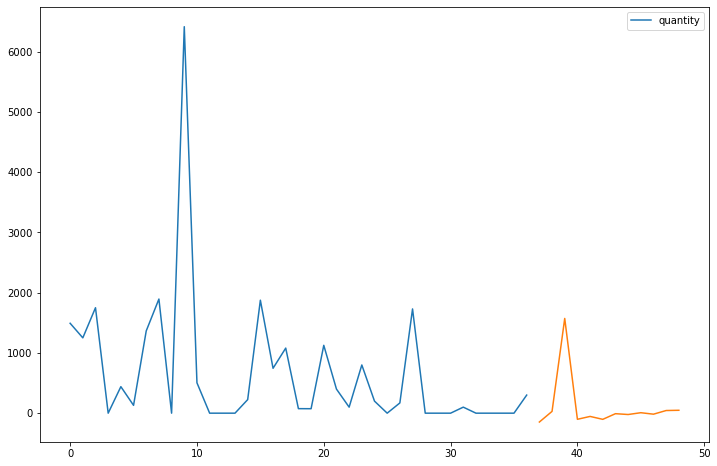

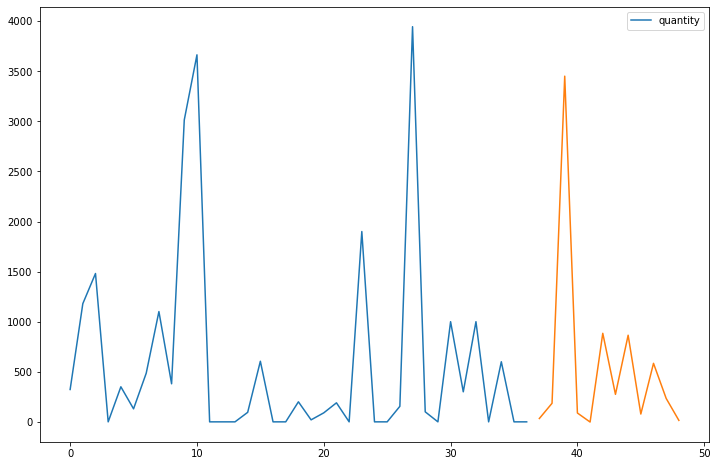

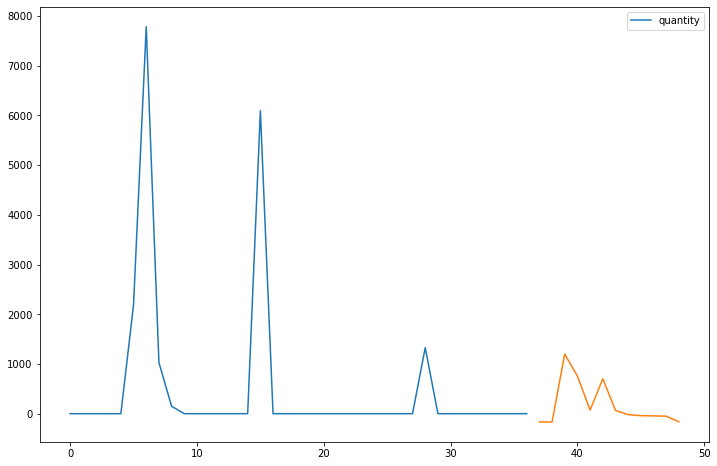

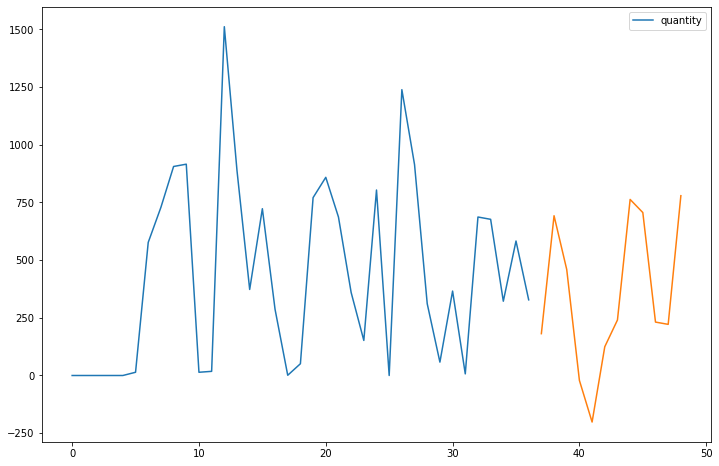

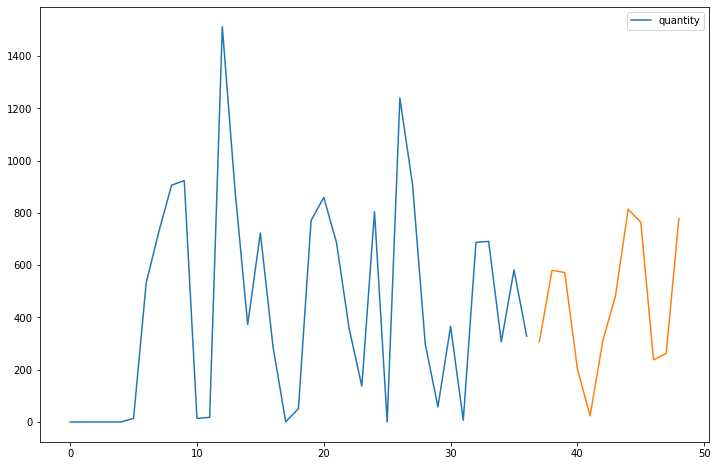

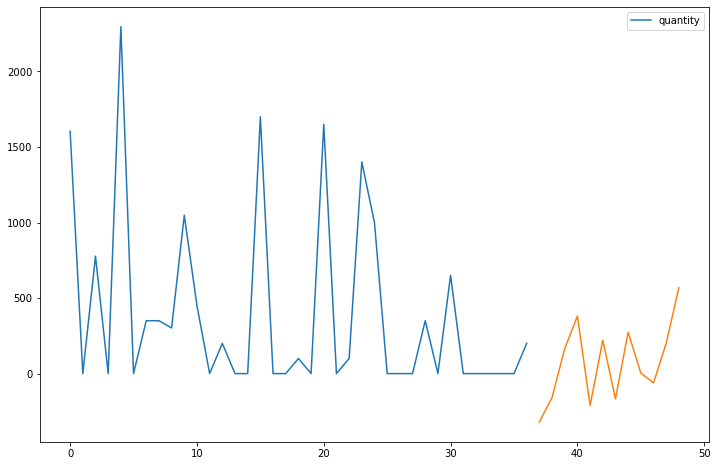

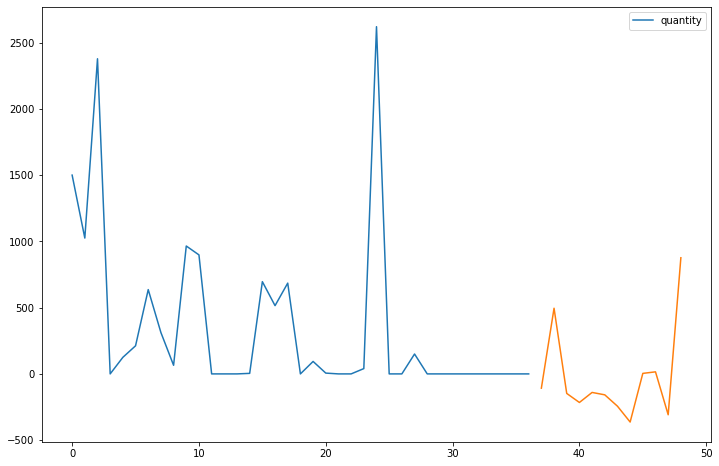

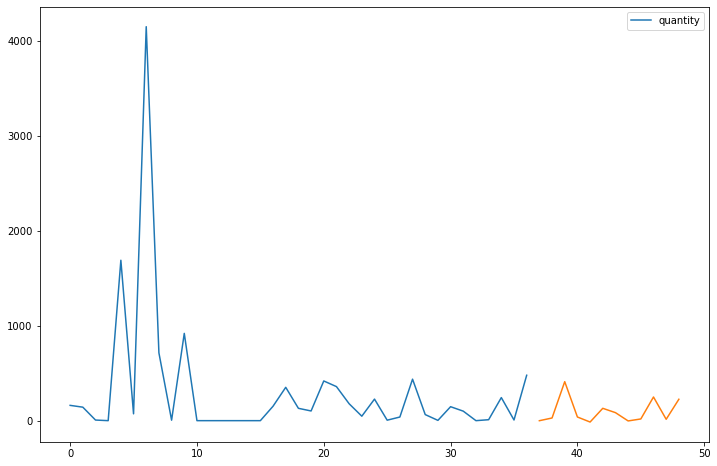

In [14]:
#Forecast quantity for next 12 months and writing to my_file.xlxx

from statsmodels.tsa.holtwinters import ExponentialSmoothing
#writer = pd.ExcelWriter('my_file.xlsx',engine='xlsxwriter')

for i in range(0,10):
    ndf = pd.DataFrame({'year':datenames,'quantity':df2.iloc[i].tolist()})
    train = ndf.iloc[:]
    test = ndf.iloc[:] 
    model = ExponentialSmoothing(train['quantity'],seasonal = 'add',seasonal_periods=12).fit()
    mf = model.forecast(12)
    
    test.plot()      
    mmf = mf.to_frame(name = 'quantity')
    test.drop(["year"], axis = 1, inplace = True)
    
    print("MCode = ",df1['Mcode'].iloc[i])
    test1 = test.append(mmf)
    #test1.to_excel(writer, sheet_name= str(df1['Mcode'].iloc[i]), startrow=0 , startcol=0)
    
    mf.plot(figsize=(12,8))
    
#writer.save() 
  


In [15]:
# writer = pd.ExcelWriter('my_file.xlsx',engine='xlsxwriter')
# df1.to_excel(writer, sheet_name= 'top10', startrow=0 , startcol=0)
# writer.save() 

In [16]:
#Write top 10 materials to my_file_1
#df1.to_excel('my_file_1.xlsx',sheet_name = 'top10')

In [17]:
#Write top 10 materials to my_file_1
#bdf.to_excel('my_file_2.xlsx',sheet_name = 'bottom10')

In [18]:
dl1 = df.tail(10)
mat=[]
for i in dl1["Mcode"]: 
    col=[]
    for mm_yy in daterange:
        val = s2.loc[(s2.Dpt_date.dt.month == mm_yy.month) & (s2.Dpt_date.dt.year == mm_yy.year) & (s2.Mcode == i )].Qty.sum()
        col.append(val)
    mat.append(col)
    val = 0


datenames = daterange.strftime("%Y-%b").tolist()
dl2= pd.DataFrame(mat,columns=datenames)
dl2.index = dl1["Mcode"]
dl2

,2013-Sep,2013-Oct,2013-Nov,2013-Dec,2014-Jan,2014-Feb,2014-Mar,2014-Apr,2014-May,2014-Jun,...,2015-Dec,2016-Jan,2016-Feb,2016-Mar,2016-Apr,2016-May,2016-Jun,2016-Jul,2016-Aug,2016-Sep
Mcode,,,,,,,,,,,,,,,,,,,,,
1376,0.0,0.0,0.000,0.0,0.0,0.0,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91206,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18182,0.0,0.3,0.092,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5863,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
989,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1324,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3749,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2922,0.0,0.0,0.000,0.0,0.0,0.0,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


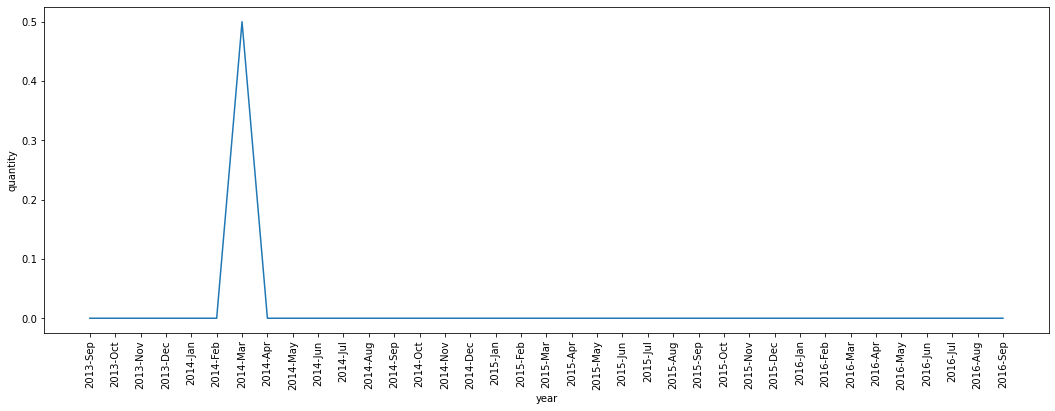

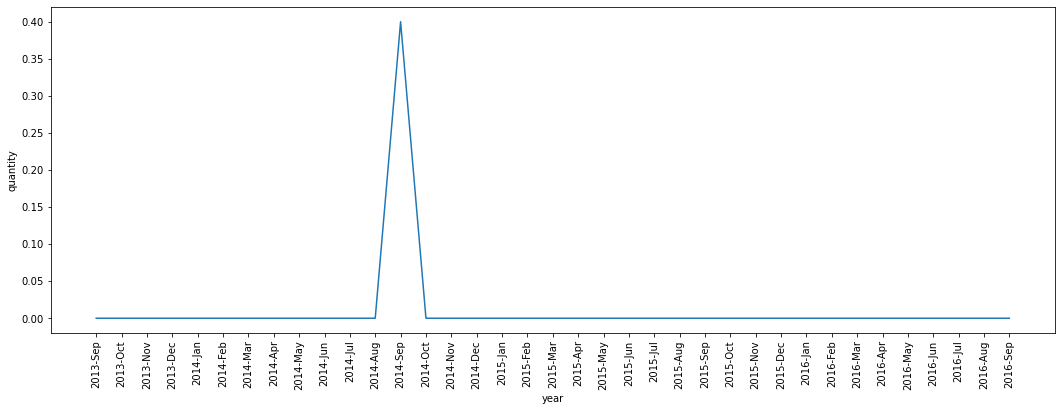

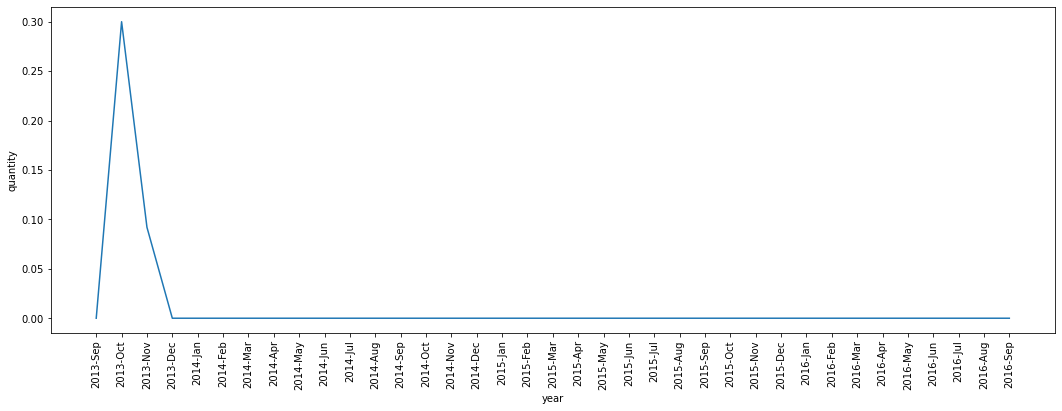

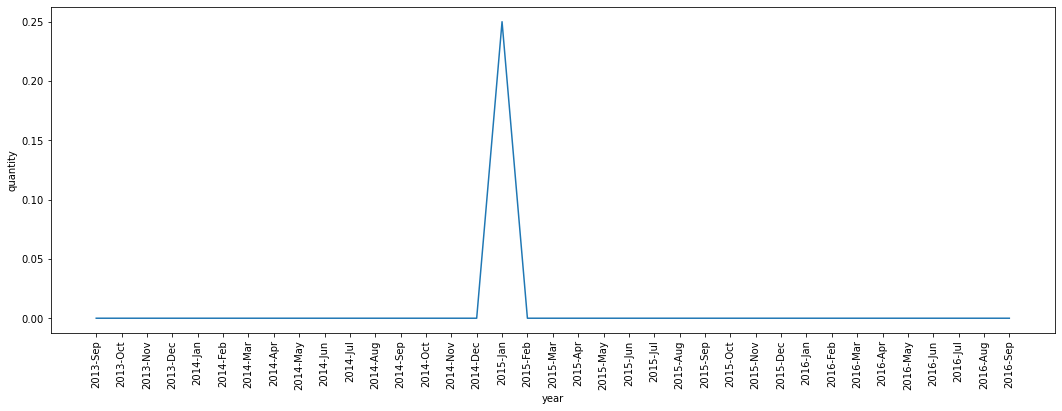

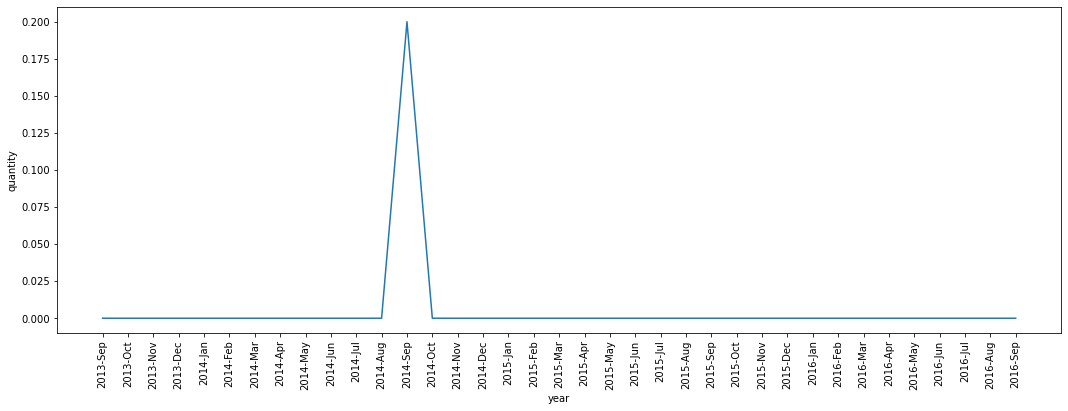

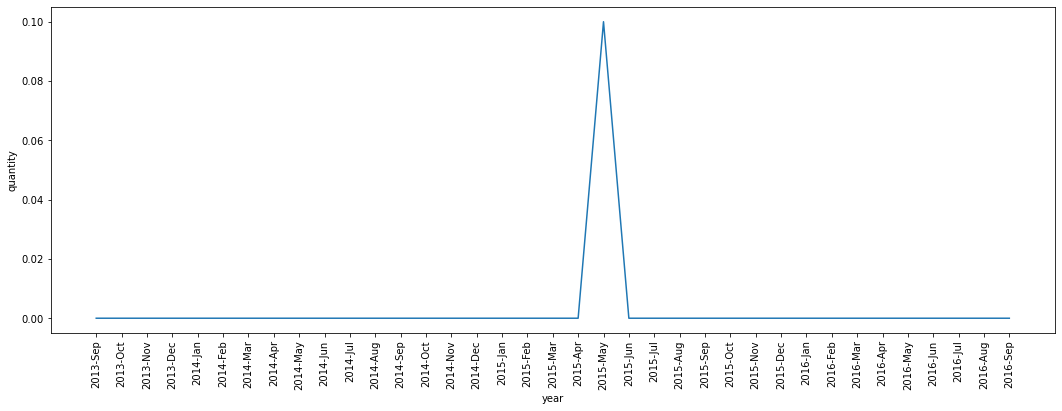

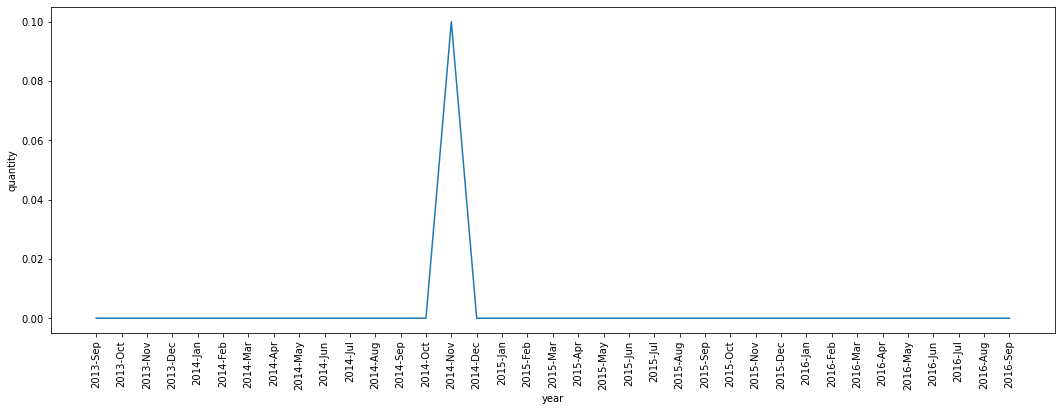

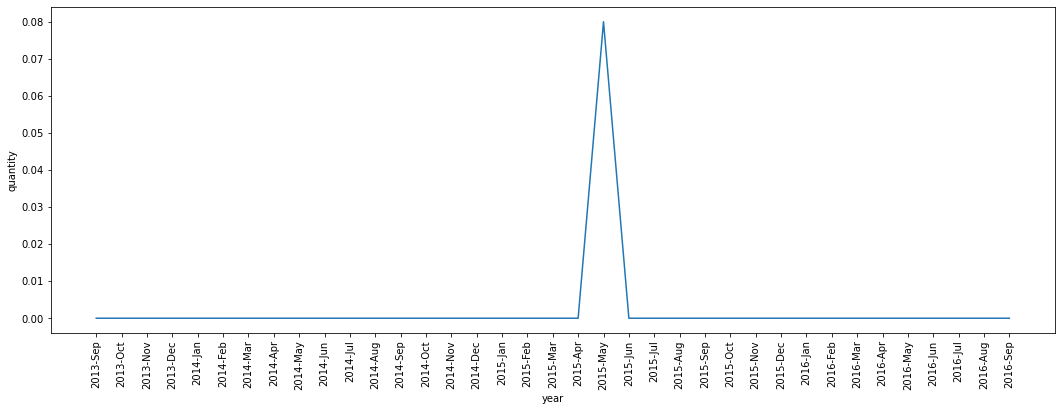

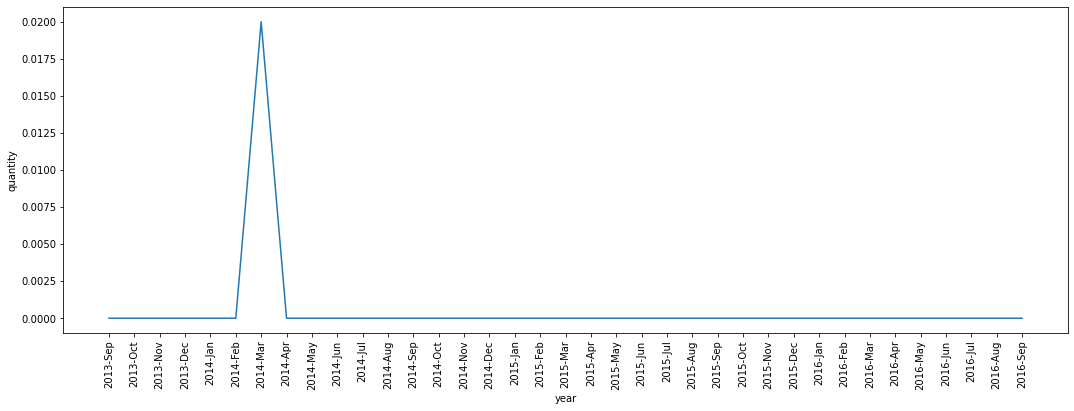

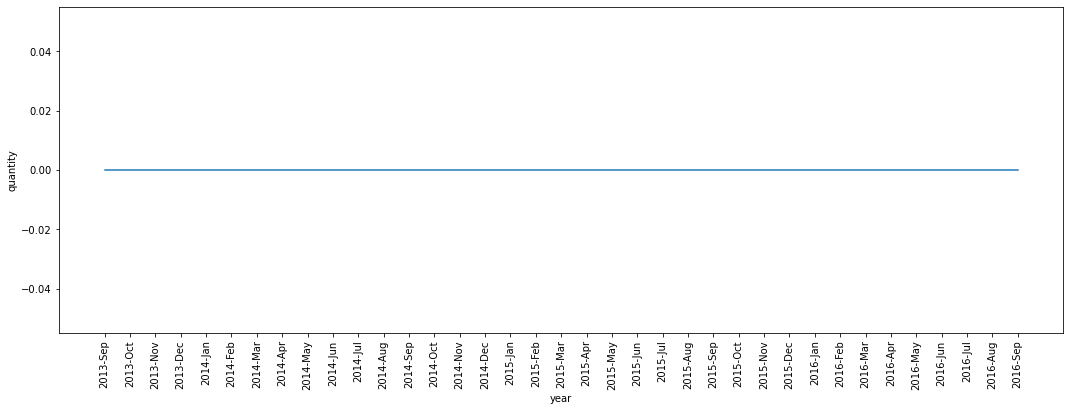

In [19]:
for i in range(0,10):
    ndl = pd.DataFrame({'year':datenames,'quantity':dl2.iloc[i].tolist()})
    ndl
   # plt.plot(x="year",y="quantity")  
    f = plt.figure()
    f.set_figwidth(18)
    f.set_figheight(6)
    plt.plot(ndl['year'],ndl['quantity'])
    plt.xticks(rotation=90)
    plt.xlabel('year')
    plt.ylabel('quantity')
    plt.show()
    

In [20]:

from statsmodels.tsa.seasonal import seasonal_decompose
writer = pd.ExcelWriter('str_bottom.xlsx',engine='xlsxwriter')
for i in range(0,10,1):
    ndl = pd.DataFrame({'year':datenames,'quantity':dl2.iloc[i].tolist()})
    #ndf
    #print(ndl)
    final = seasonal_decompose(ndl['quantity'],model='add',extrapolate_trend='freq',period=int(len(ndf)/2))
    
    temp_trend = pd.DataFrame(final.trend)
    temp_seasonal = pd.DataFrame(final.seasonal)
    temp_resid = pd.DataFrame(final.resid)
    result = pd.concat([temp_trend, temp_seasonal,temp_resid], axis=1, join='inner')
    
    result.to_excel(writer, sheet_name= str(dl1['Mcode'].iloc[i])+('_str'), startrow=0 , startcol=0)
    #display(result)
    
writer.save()

D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


MCode =  1376
MCode =  91206


D:\Users\Admin\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


MCode =  18182
MCode =  5863


D:\Users\Admin\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


MCode =  989
MCode =  1325


D:\Users\Admin\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


MCode =  1324


D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


MCode =  3749
MCode =  2922


D:\Users\Admin\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1439: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1445: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1439: RuntimeWarning: divide by 

MCode =  0


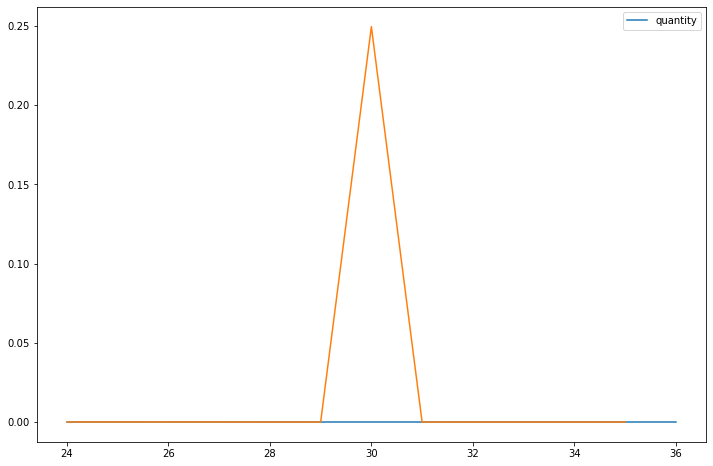

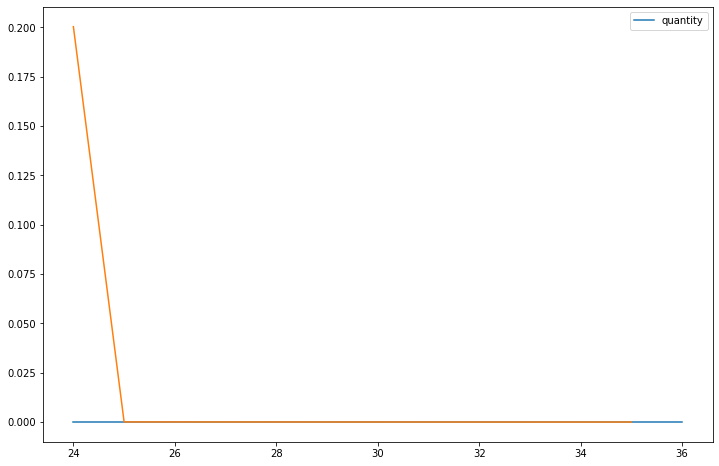

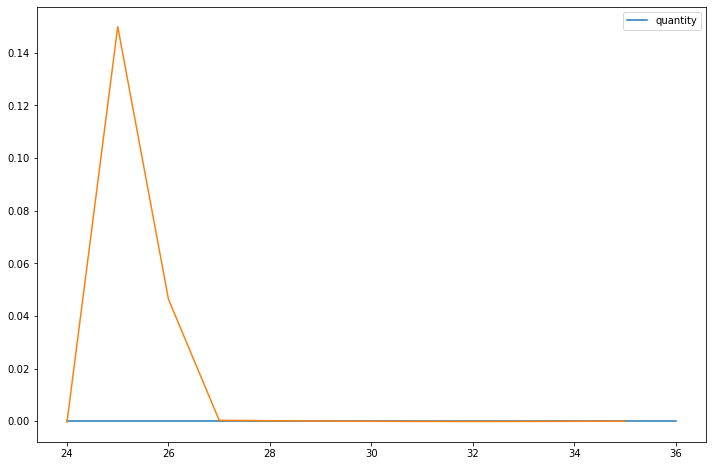

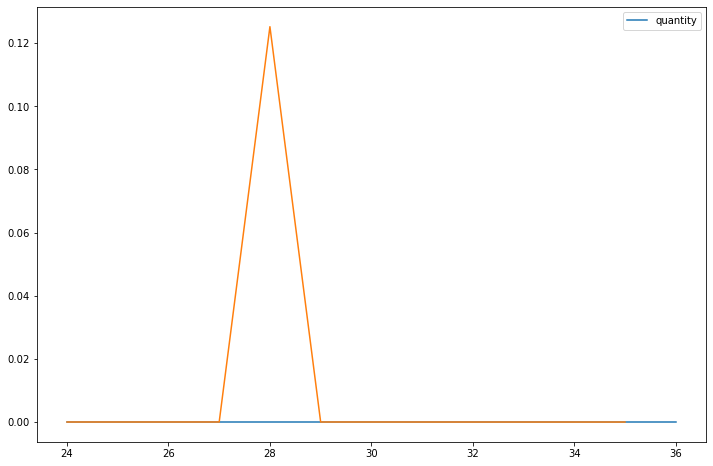

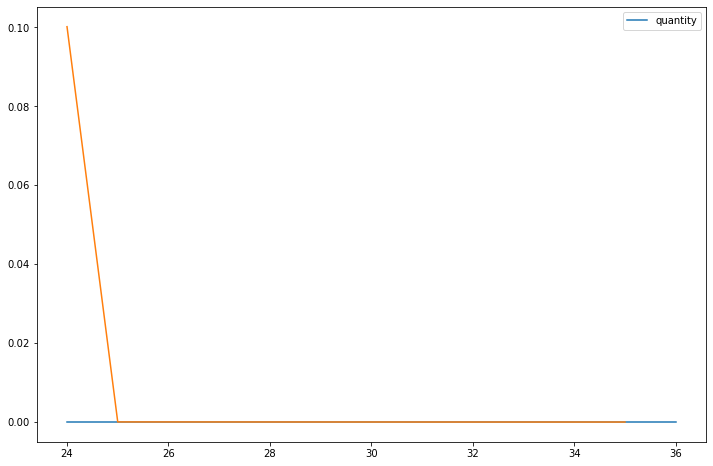

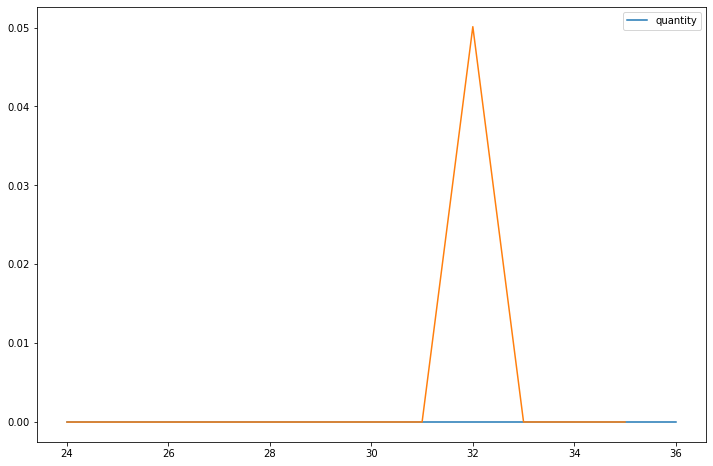

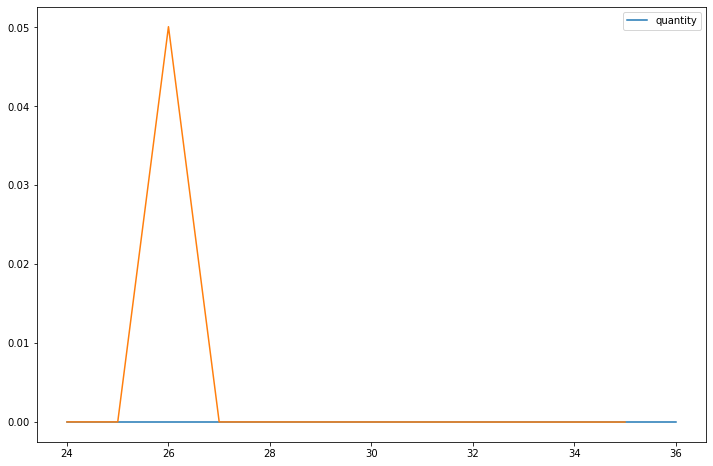

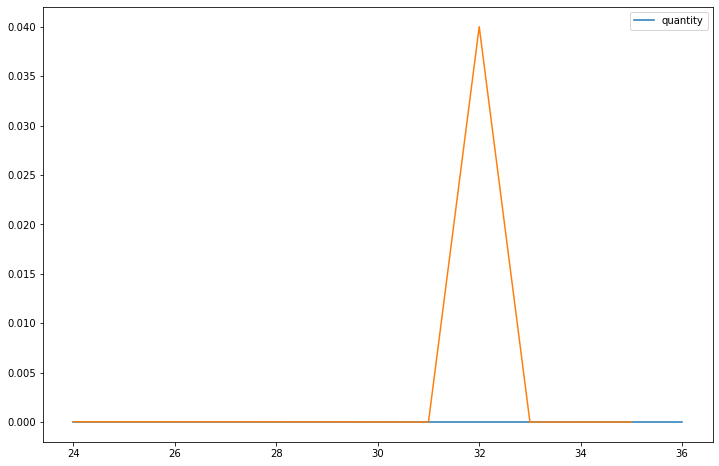

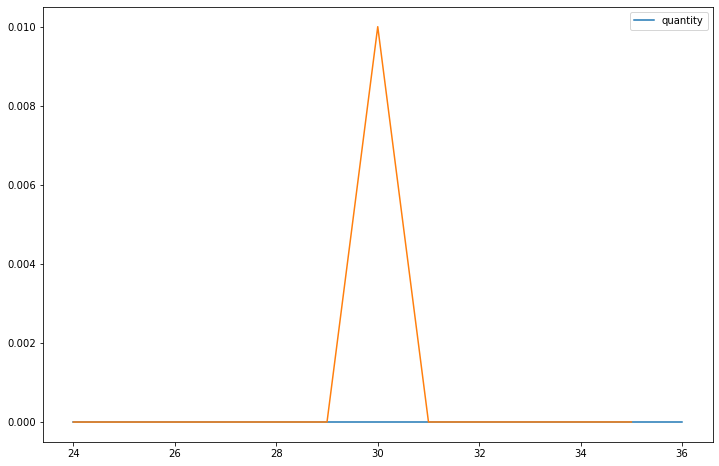

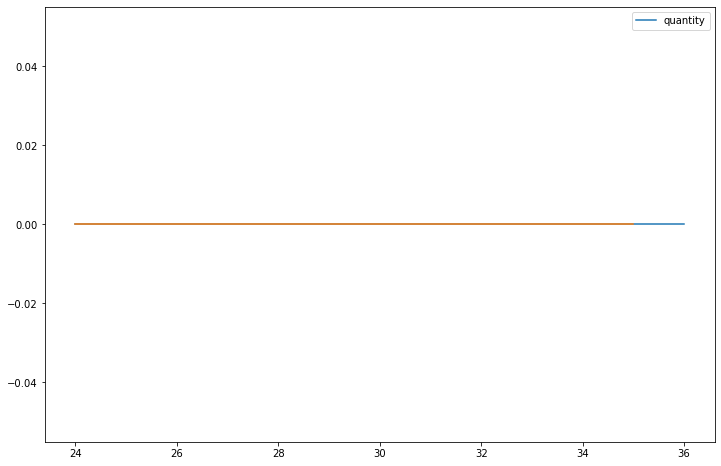

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#writer = pd.ExcelWriter('my_file_bottom.xlsx',engine='xlsxwriter')

for i in range(0,10):
    ndl = pd.DataFrame({'year':datenames,'quantity':dl2.iloc[i].tolist()})
    train = ndl.iloc[:24]
    test = ndl.iloc[24:]
    #train.plot()   
    model = ExponentialSmoothing(train['quantity'],seasonal = 'add',seasonal_periods=12).fit()
    test.plot()
    #model.forecast(12).plot(figsize=(12,8))
    
    mf = model.forecast(12)
    
    #test.plot()      
    mmf = mf.to_frame(name = 'quantity')
    test.drop(["year"], axis = 1, inplace = True)
    
    print("MCode = ",dl1['Mcode'].iloc[i])
    test1 = test.append(mmf)
    #test1.to_excel(writer, sheet_name= str(dl1['Mcode'].iloc[i]), startrow=0 , startcol=0)   
    mf.plot(figsize=(12,8))
    
#writer.save()

In [22]:
#weekly analysis of top 10

daterange = pd.date_range('2013-09-01','2016-09-30', freq='W')
daterange

DatetimeIndex(['2013-09-01', '2013-09-08', '2013-09-15', '2013-09-22',
               '2013-09-29', '2013-10-06', '2013-10-13', '2013-10-20',
               '2013-10-27', '2013-11-03',
               ...
               '2016-07-24', '2016-07-31', '2016-08-07', '2016-08-14',
               '2016-08-21', '2016-08-28', '2016-09-04', '2016-09-11',
               '2016-09-18', '2016-09-25'],
              dtype='datetime64[ns]', length=161, freq='W-SUN')

In [23]:

#week wise quantity of each material from sep 2014 to dec 2016
from datetime import timedelta

mat=[]
for i in df1["Mcode"]:
    col=[]
    for mm_yy in daterange:
        mm_yy_end = mm_yy + timedelta(days=6)
        for dd_mm_yy in pd.date_range(mm_yy,mm_yy_end,freq='D'):
#        if((s2.Dpt_date.dt.month == mm_yy.month) & (s2.Dpt_date.dt.year == mm_yy.year) & (s2.Mcode == i ) & (s2.Dpt_date.dt.day >= mm_yy.day) & (s2.Dpt_date.dt.day < mm_yy_end.day))
            val += s2.loc[(s2.Dpt_date.dt.day == dd_mm_yy.day) & (s2.Dpt_date.dt.month == dd_mm_yy.month) & (s2.Dpt_date.dt.year == dd_mm_yy.year) & (s2.Mcode == i )].Qty.sum()
        col.append(val)
        val = 0
    mat.append(col)
       


datenames = daterange.strftime("%Y-%b-%W").tolist()
df2= pd.DataFrame(mat,columns=datenames)
df2.index = df1["Mcode"]
df2

,2013-Sep-34,2013-Sep-35,2013-Sep-36,2013-Sep-37,2013-Sep-38,2013-Oct-39,2013-Oct-40,2013-Oct-41,2013-Oct-42,2013-Nov-43,...,2016-Jul-29,2016-Jul-30,2016-Aug-31,2016-Aug-32,2016-Aug-33,2016-Aug-34,2016-Sep-35,2016-Sep-36,2016-Sep-37,2016-Sep-38
Mcode,,,,,,,,,,,,,,,,,,,,,
25875,0.0,0.0,0.0,1000.0,0.0,200.0,0.0,0.0,864.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,300.0
89377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24828,9.0,6.0,0.0,1477.0,0.0,300.0,0.0,0.0,950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0
44546,0.0,0.0,0.0,323.0,0.0,300.0,0.0,0.0,880.0,0.0,...,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,125.0,7.0,59.0,241.0,232.0,14.0,125.0,85.0,23.0
20399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,125.0,7.0,59.0,240.0,232.0,14.0,125.0,85.0,23.0
31256,0.0,4.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0
25873,0.0,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,1025.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


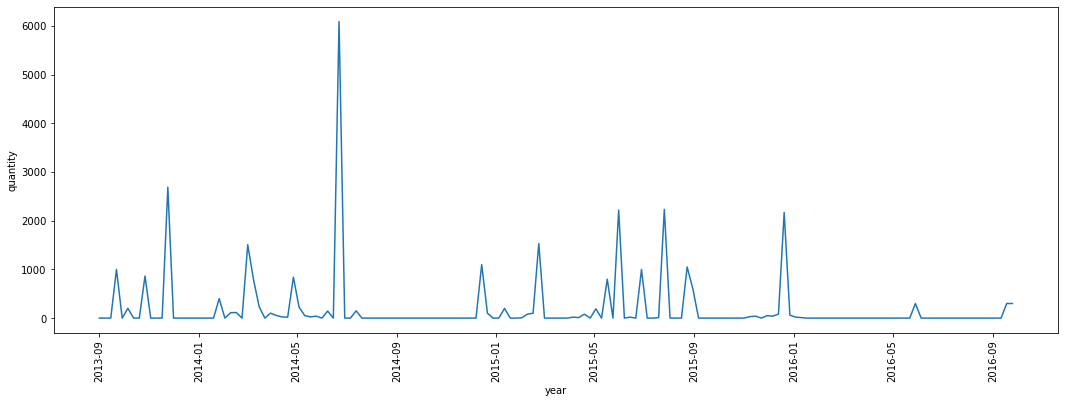

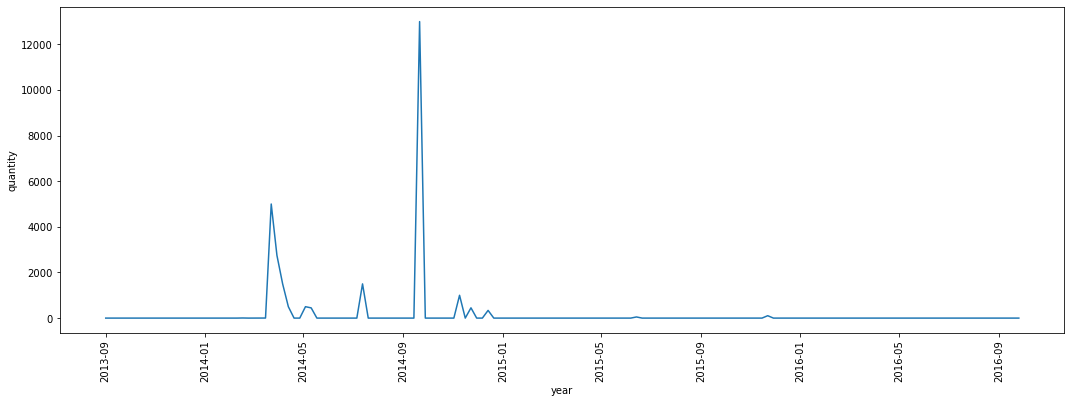

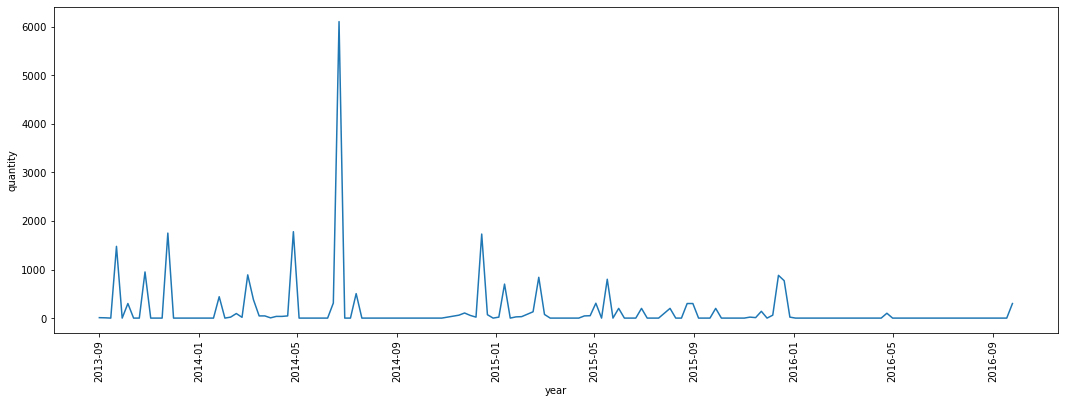

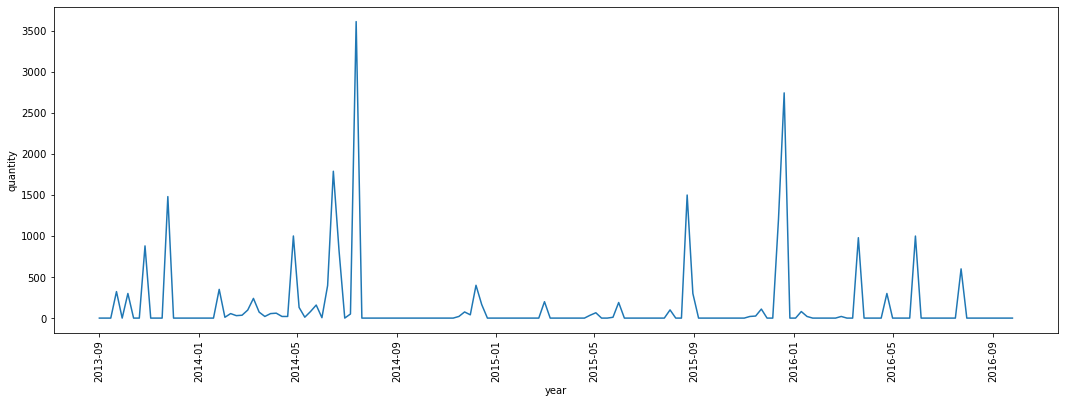

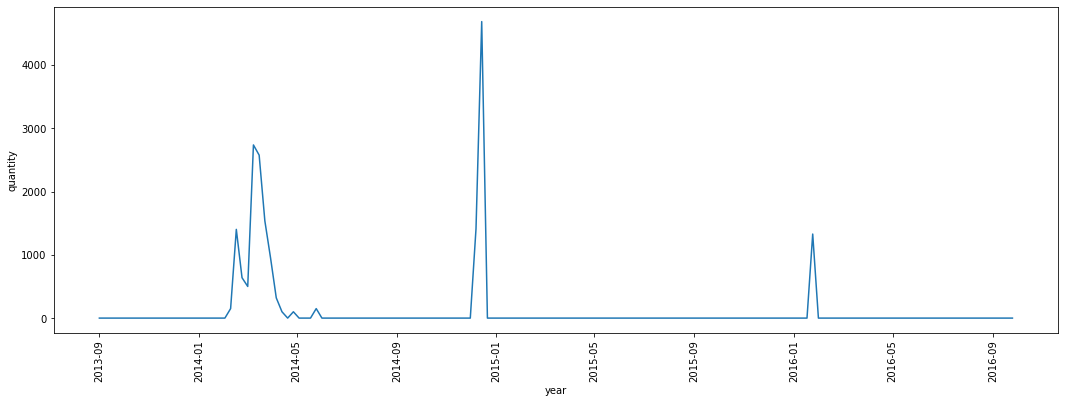

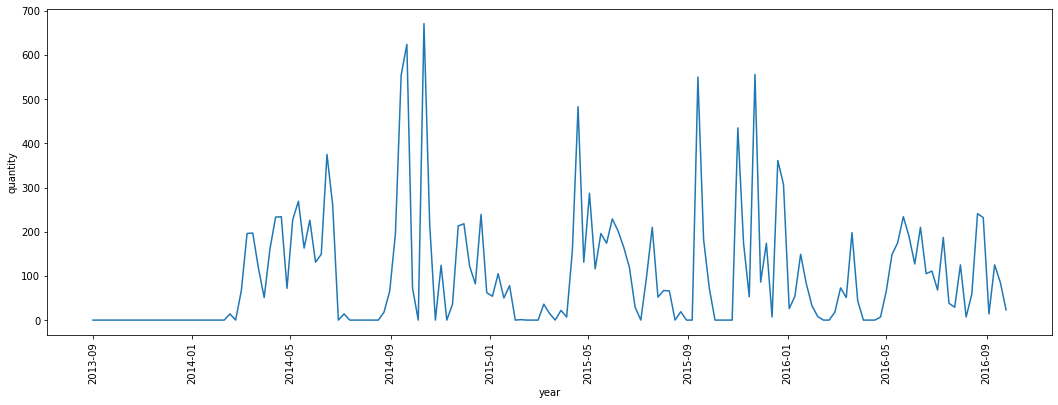

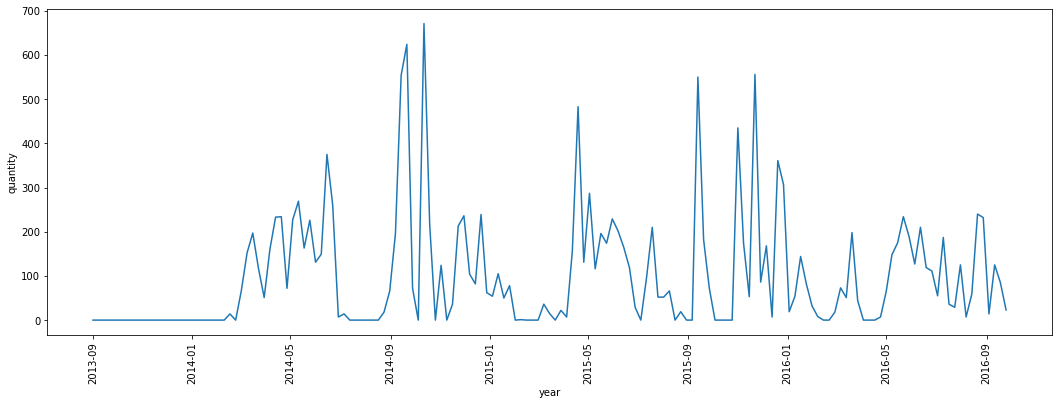

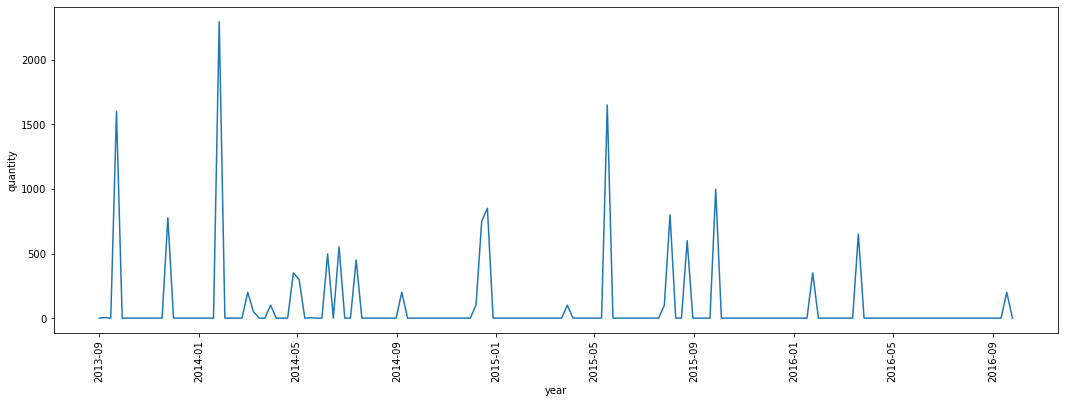

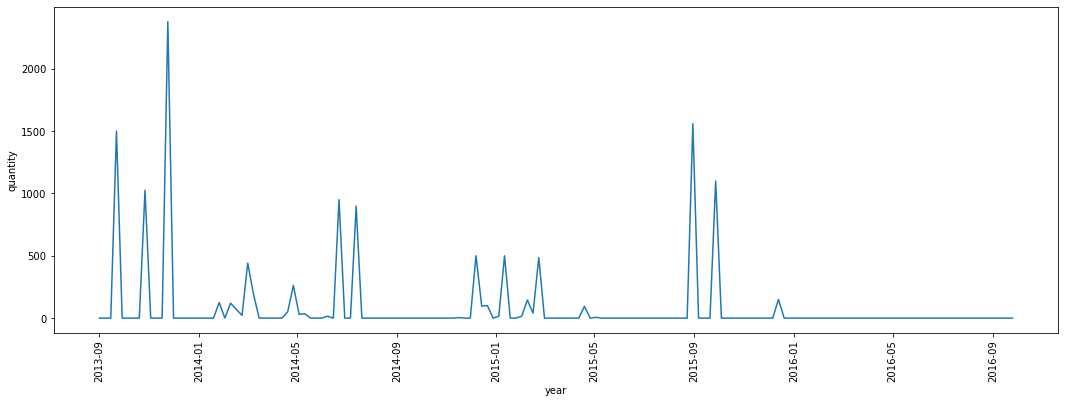

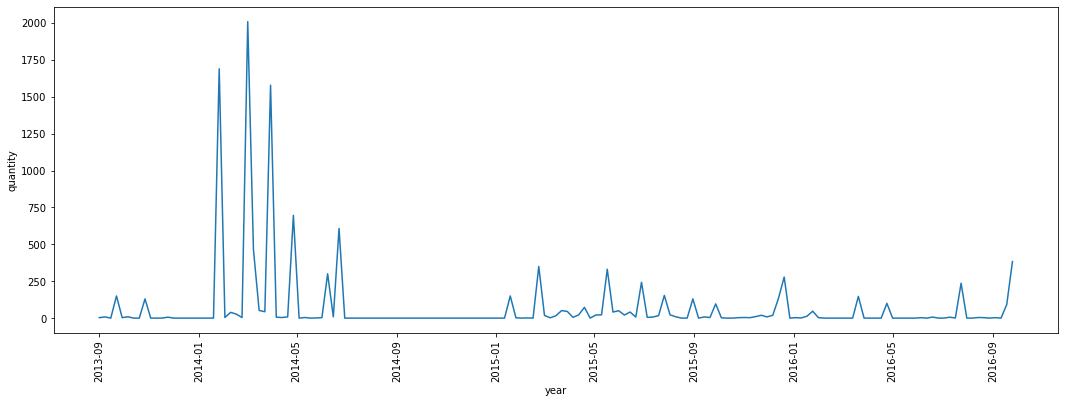

In [24]:
#plotting using matplotlib lib

for i in range(0,10):
    daterange = pd.date_range('2013-09-01','2016-09-30', freq='W')
    daterange
    ndf = pd.DataFrame({'year':daterange,'quantity':df2.iloc[i].tolist()})
    ndf
   # plt.plot(x="year",y="quantity")  
    f = plt.figure()
    f.set_figwidth(18)
    f.set_figheight(6)
    plt.plot(ndf['year'],ndf['quantity'])
    plt.xticks(rotation=90)
    plt.xlabel('year')
    plt.ylabel('quantity')
    plt.show()

            year  quantity
0    2013-Sep-34       3.0
1    2013-Sep-35       8.0
2    2013-Sep-36       0.0
3    2013-Sep-37     150.0
4    2013-Sep-38       3.0
..           ...       ...
156  2016-Aug-34       0.0
157  2016-Sep-35       3.0
158  2016-Sep-36       0.0
159  2016-Sep-37      92.0
160  2016-Sep-38     383.0

[161 rows x 2 columns]


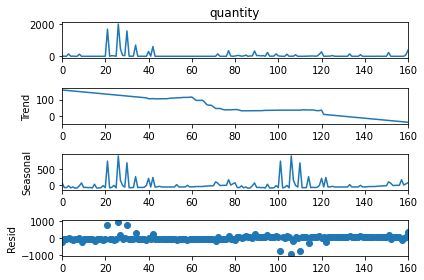

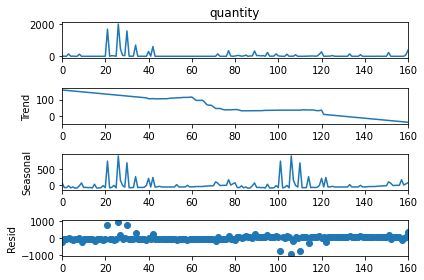

In [25]:
#trend,seasonality using statsmodel-seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose

ndf = pd.DataFrame({'year':datenames,'quantity':df2.iloc[9].tolist()})
#ndf
print(ndf)
final = seasonal_decompose(ndf['quantity'],model='add',extrapolate_trend='freq',period=int(len(ndf)/2))
final.plot()
#final.trend.plot()
#final.seasonal.plot()

D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization m

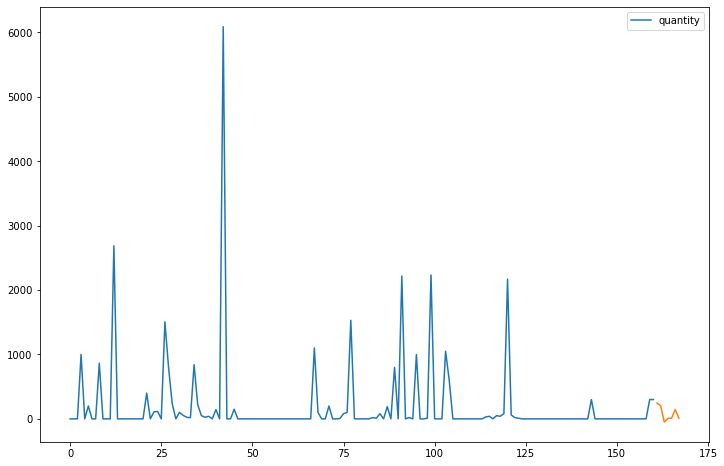

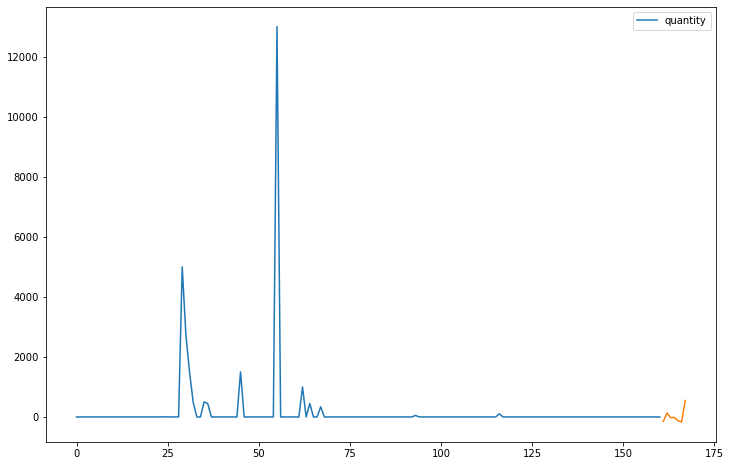

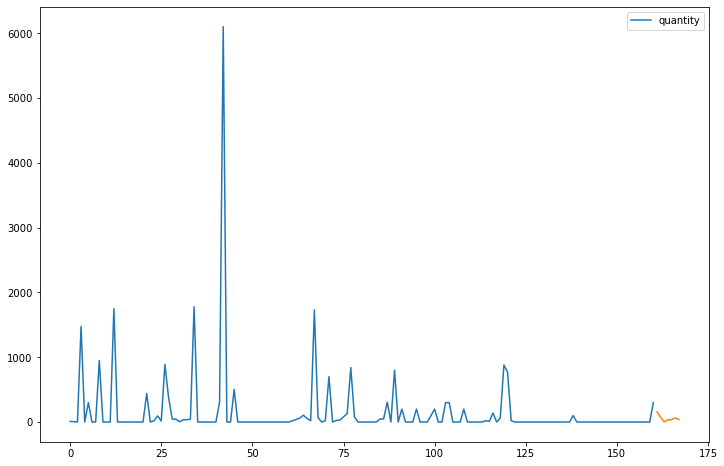

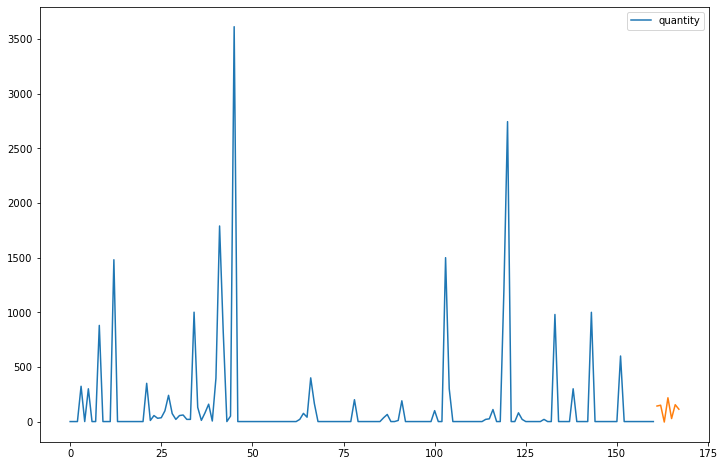

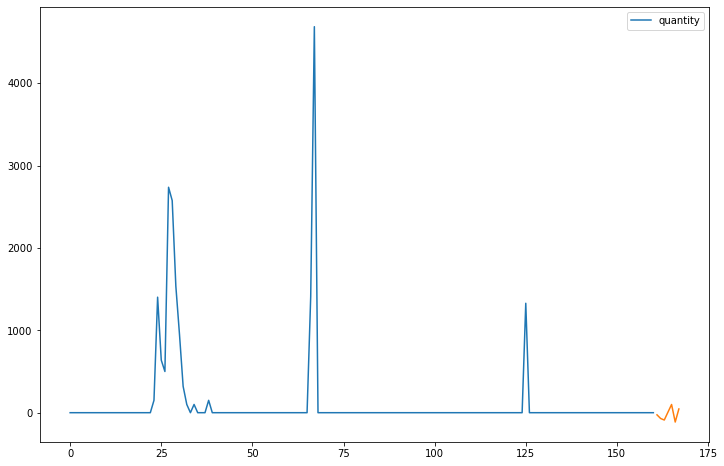

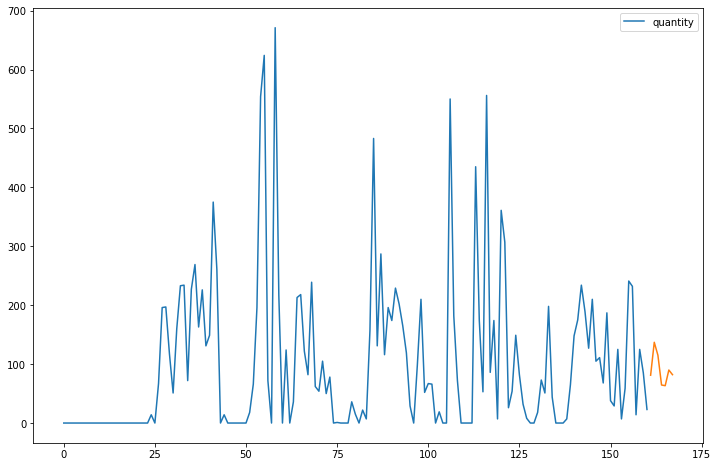

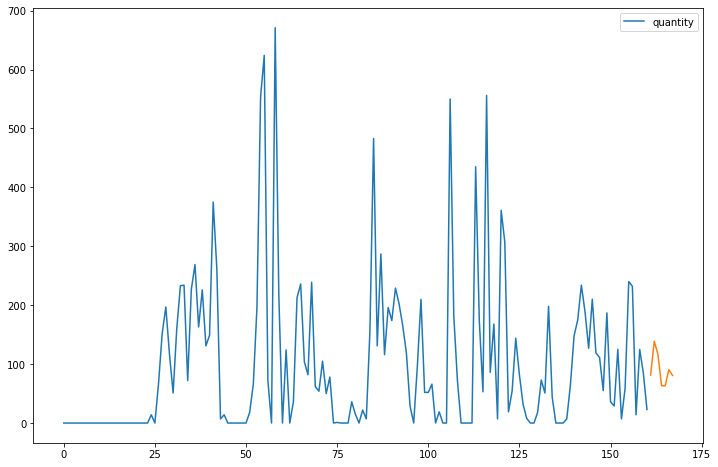

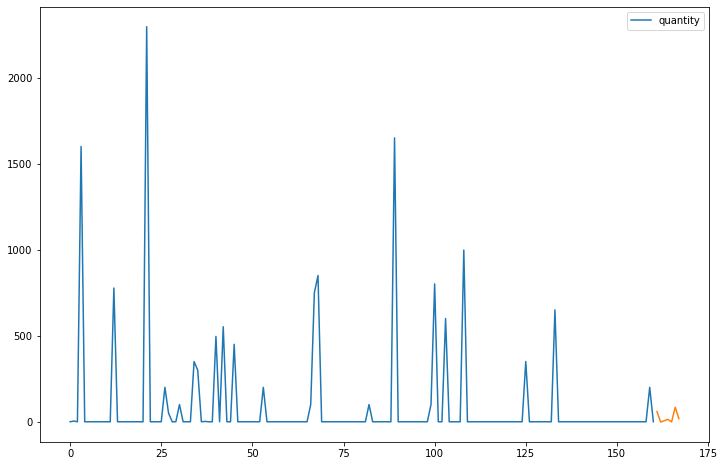

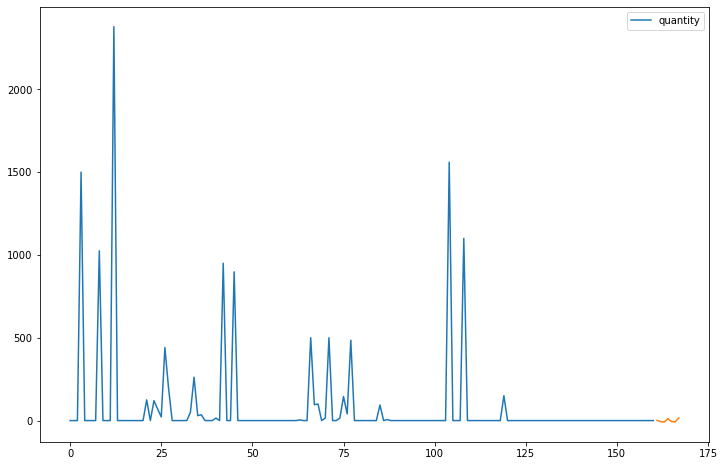

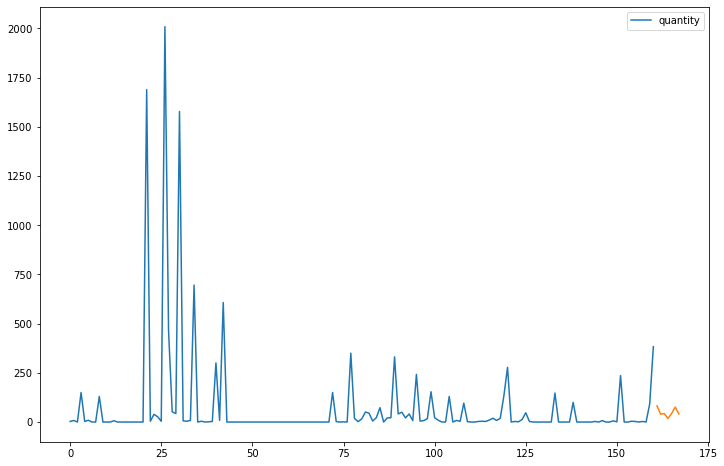

In [26]:
#print(ndf['quantity'].mean())
#ndf = ndf.replace(0,ndf['quantity'].mean())
from statsmodels.tsa.holtwinters import ExponentialSmoothing
for i in range(0,10):
    ndf = pd.DataFrame({'year':datenames,'quantity':df2.iloc[i].tolist()})
    train = ndf.iloc[:]
    test = ndf.iloc[:]
    #train.plot()   
    model = ExponentialSmoothing(train['quantity'],seasonal = 'add',seasonal_periods=7).fit()
    test.plot()
    model.forecast(7).plot(figsize=(12,8))
    

In [27]:
#week wise quantity of each material from sep 2014 to dec 2016
from datetime import timedelta

mat=[]
for i in dl1["Mcode"]:
    col=[]
    for mm_yy in daterange:
        mm_yy_end = mm_yy + timedelta(days=6)
        for dd_mm_yy in pd.date_range(mm_yy,mm_yy_end,freq='D'):
#        if((s2.Dpt_date.dt.month == mm_yy.month) & (s2.Dpt_date.dt.year == mm_yy.year) & (s2.Mcode == i ) & (s2.Dpt_date.dt.day >= mm_yy.day) & (s2.Dpt_date.dt.day < mm_yy_end.day))
            val += s2.loc[(s2.Dpt_date.dt.day == dd_mm_yy.day) & (s2.Dpt_date.dt.month == dd_mm_yy.month) & (s2.Dpt_date.dt.year == dd_mm_yy.year) & (s2.Mcode == i )].Qty.sum()
        col.append(val)
        val = 0
    mat.append(col)
       


datenames = daterange.strftime("%Y-%b-%W").tolist()
dl2= pd.DataFrame(mat,columns=datenames)
dl2.index = dl1["Mcode"]
dl2

,2013-Sep-34,2013-Sep-35,2013-Sep-36,2013-Sep-37,2013-Sep-38,2013-Oct-39,2013-Oct-40,2013-Oct-41,2013-Oct-42,2013-Nov-43,...,2016-Jul-29,2016-Jul-30,2016-Aug-31,2016-Aug-32,2016-Aug-33,2016-Aug-34,2016-Sep-35,2016-Sep-36,2016-Sep-37,2016-Sep-38
Mcode,,,,,,,,,,,,,,,,,,,,,
1376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18182,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


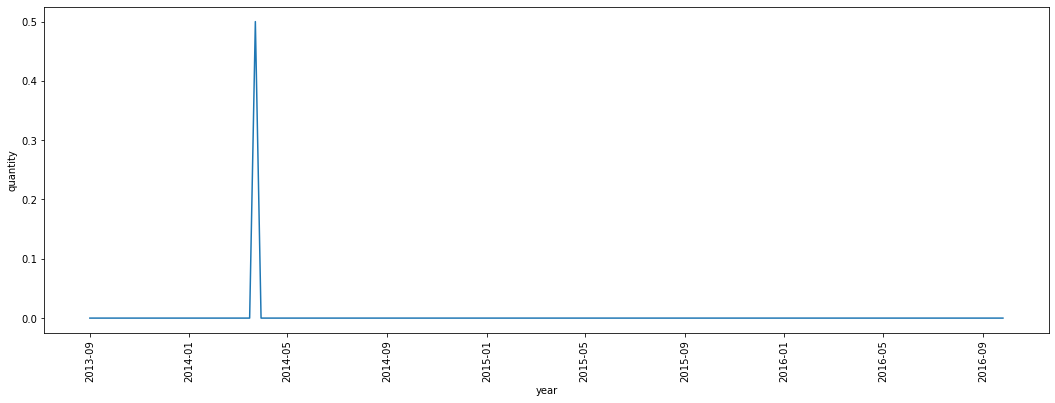

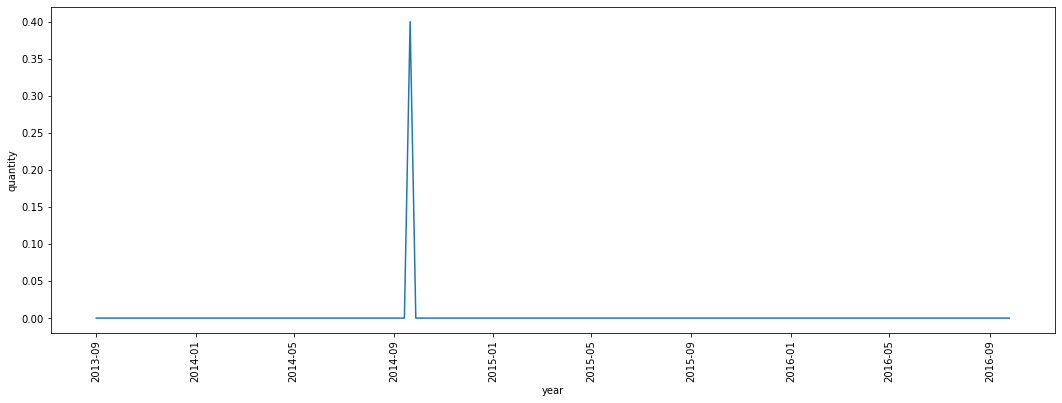

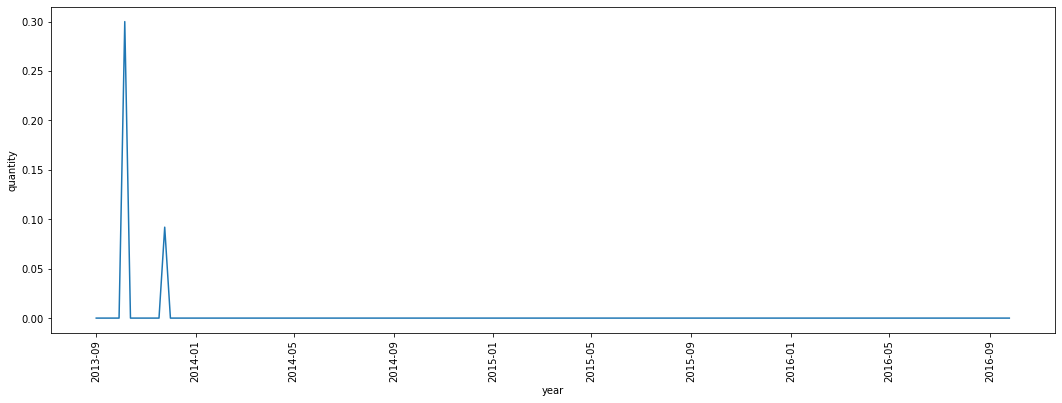

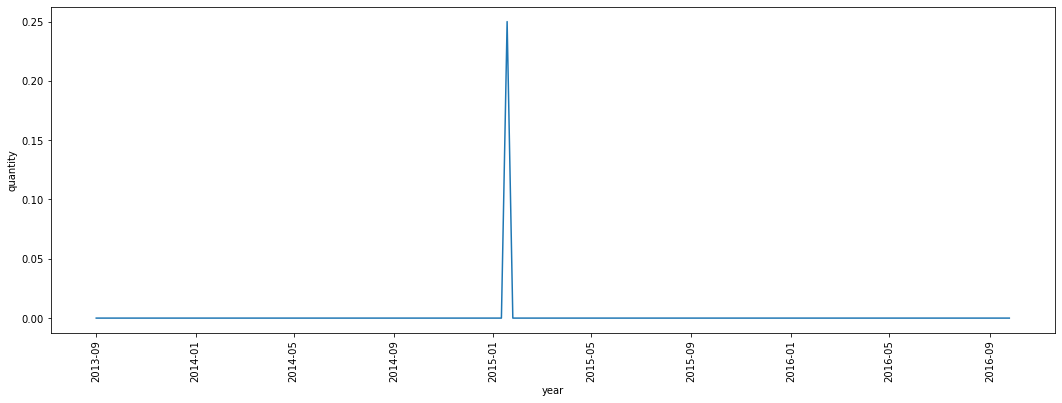

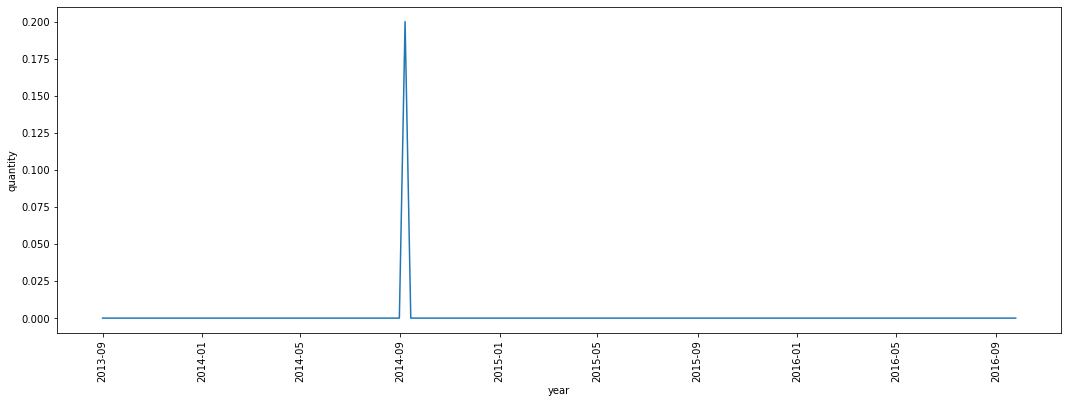

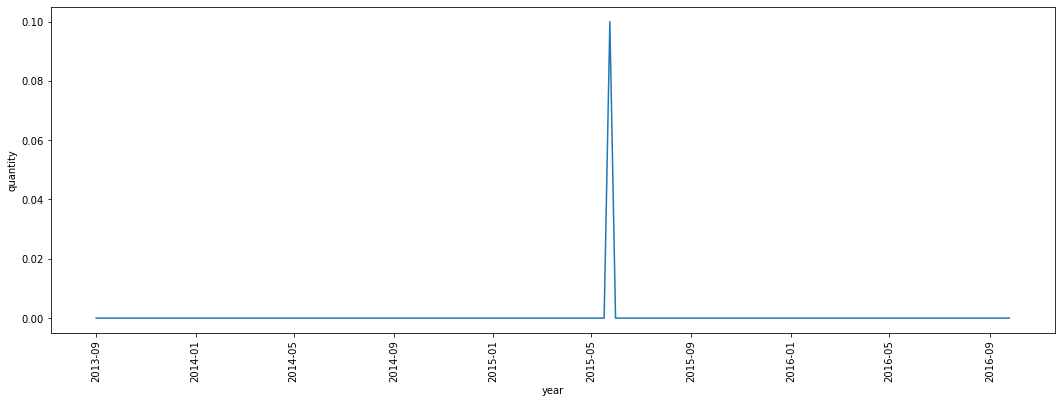

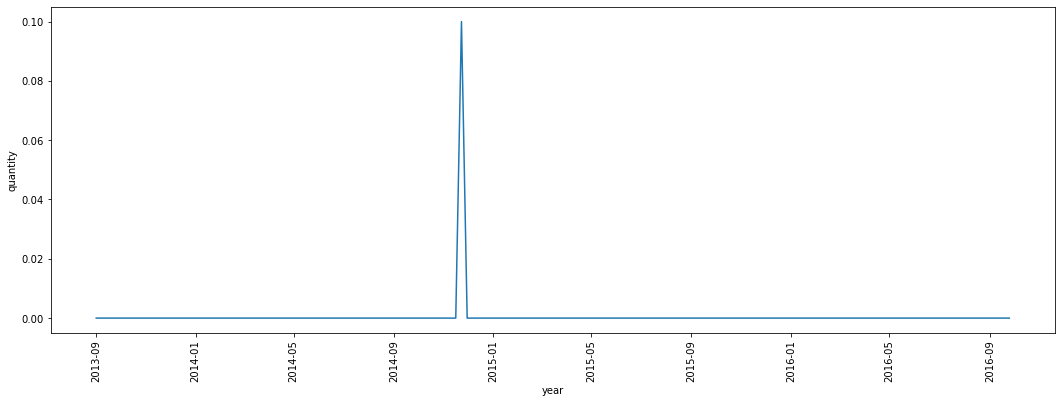

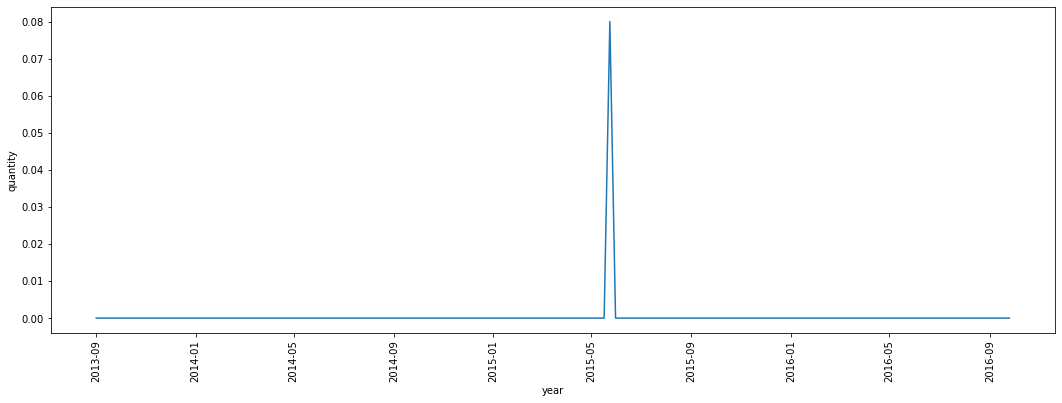

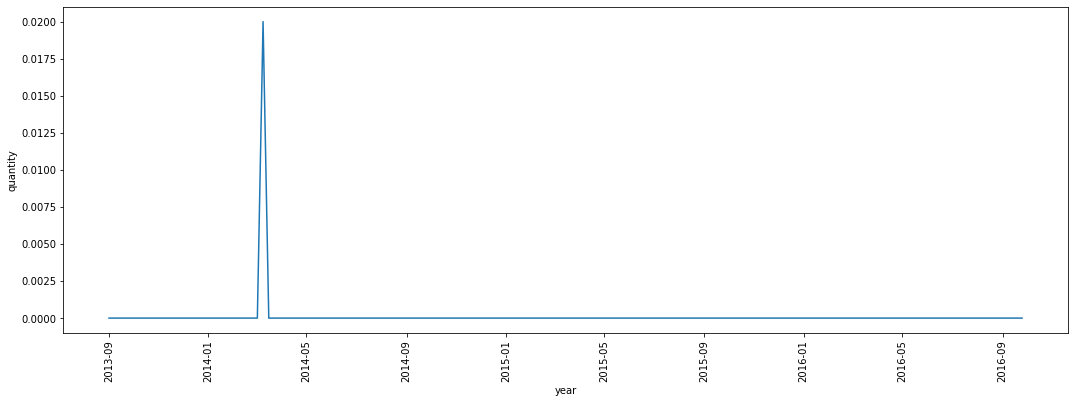

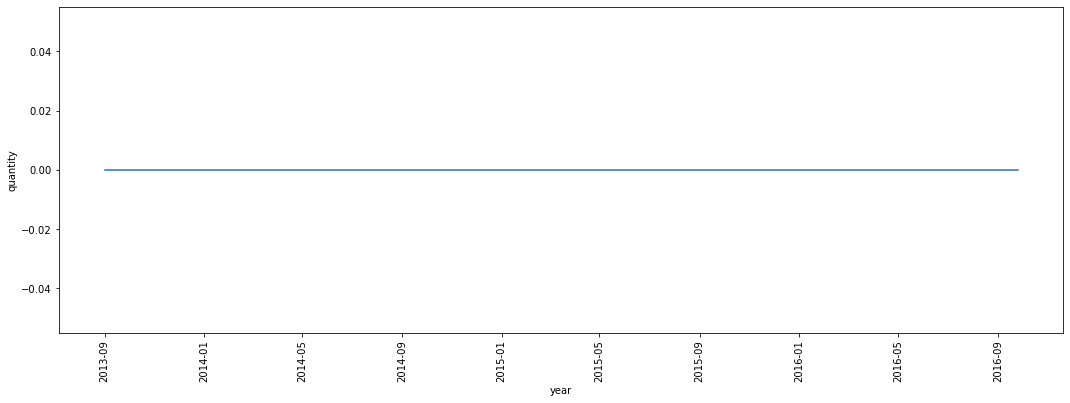

In [28]:

for i in range(0,10):
    daterange = pd.date_range('2013-09-01','2016-09-30', freq='W')
    daterange
    ndl = pd.DataFrame({'year':daterange,'quantity':dl2.iloc[i].tolist()})
    ndl
   # plt.plot(x="year",y="quantity")  
    f = plt.figure()
    f.set_figwidth(18)
    f.set_figheight(6)
    plt.plot(ndl['year'],ndl['quantity'])
    plt.xticks(rotation=90)
    plt.xlabel('year')
    plt.ylabel('quantity')
    plt.show()

            year  quantity
0    2013-Sep-34       0.0
1    2013-Sep-35       0.0
2    2013-Sep-36       0.0
3    2013-Sep-37       0.0
4    2013-Sep-38       0.0
..           ...       ...
156  2016-Aug-34       0.0
157  2016-Sep-35       0.0
158  2016-Sep-36       0.0
159  2016-Sep-37       0.0
160  2016-Sep-38       0.0

[161 rows x 2 columns]


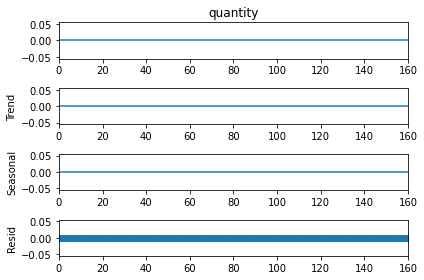

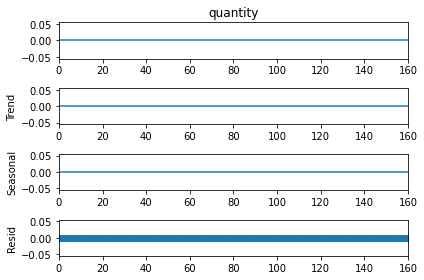

In [29]:

from statsmodels.tsa.seasonal import seasonal_decompose

ndl = pd.DataFrame({'year':datenames,'quantity':dl2.iloc[9].tolist()})
#ndf
print(ndl)
final = seasonal_decompose(ndl['quantity'],model='add',extrapolate_trend='freq',period=int(len(ndl)/2))
final.plot()
#final.trend.plot()
#final.seasonal.plot()

D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Users\Admin\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initializa

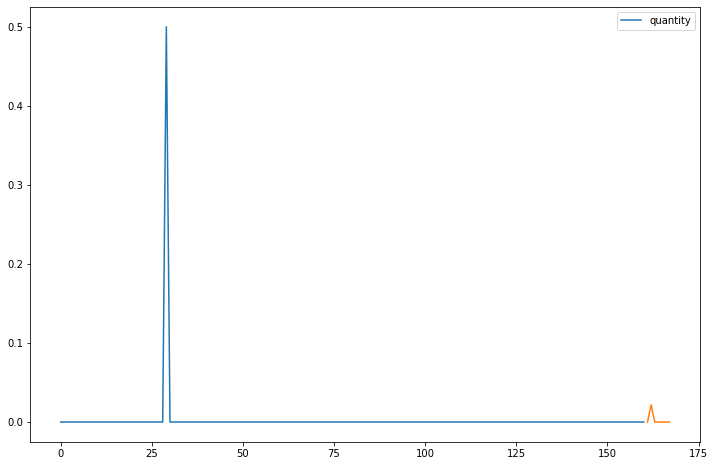

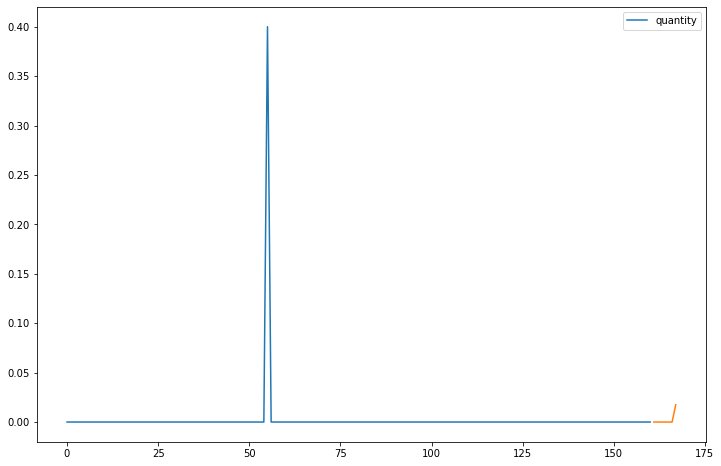

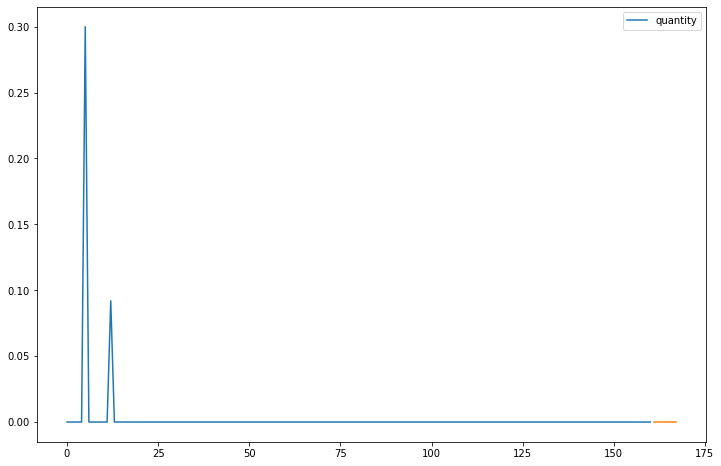

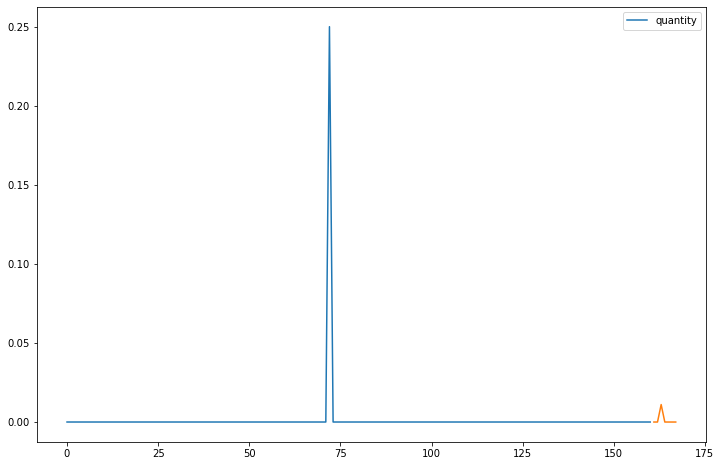

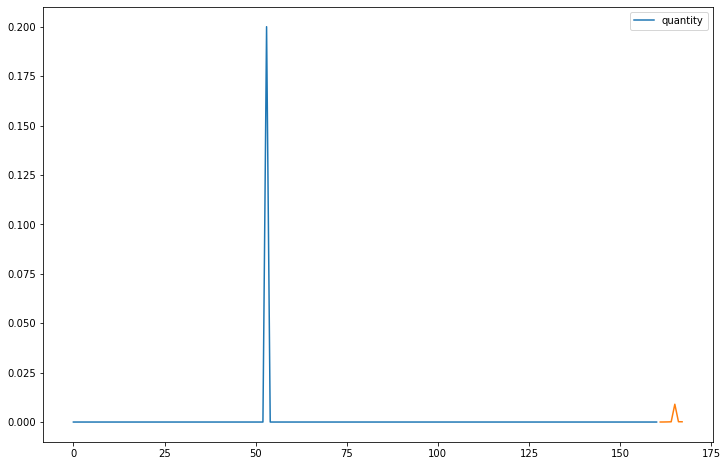

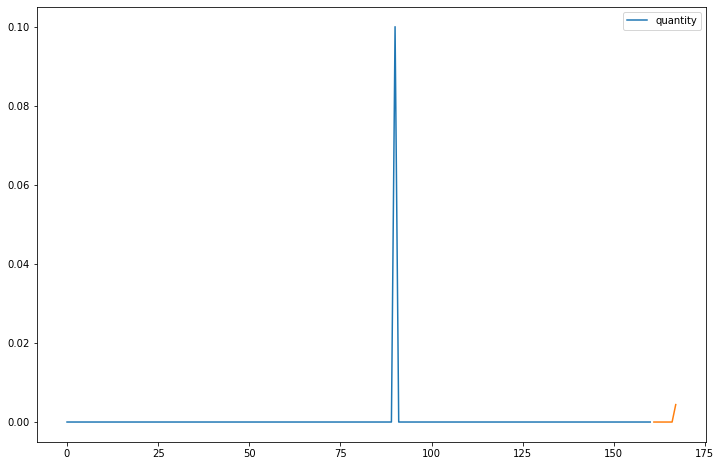

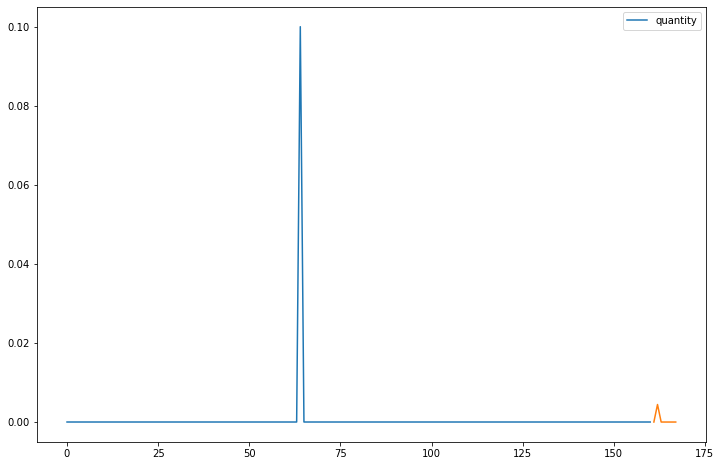

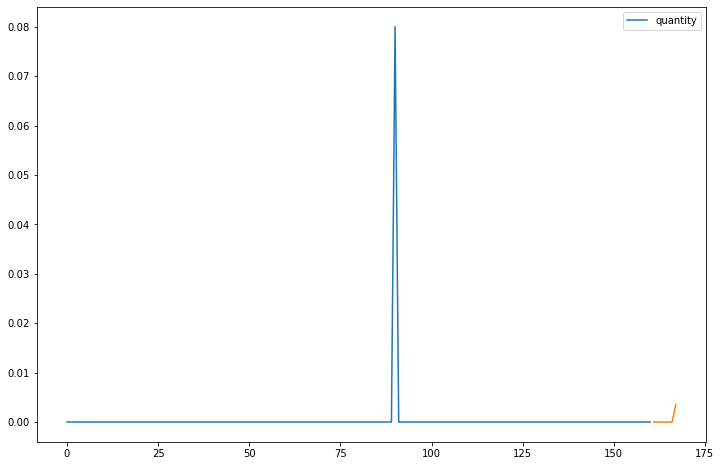

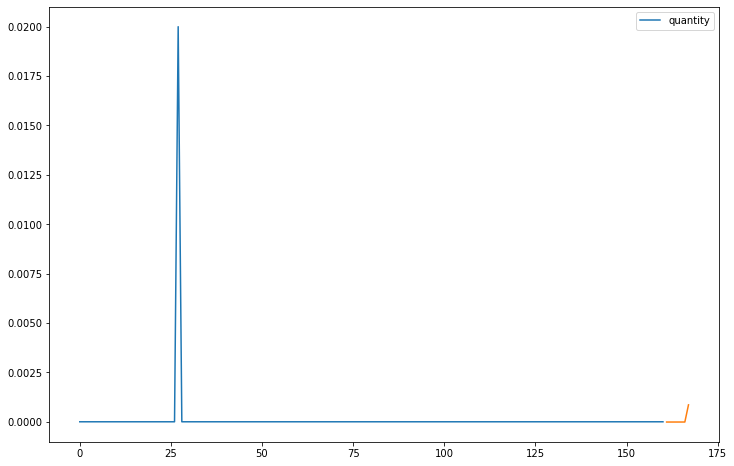

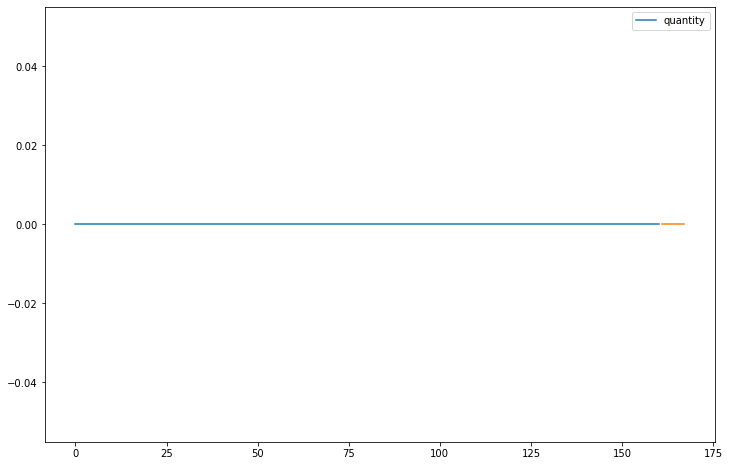

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
for i in range(0,10):
    ndl = pd.DataFrame({'year':datenames,'quantity':dl2.iloc[i].tolist()})
    train = ndl.iloc[:]
    test = ndl.iloc[:]
    #train.plot()   
    model = ExponentialSmoothing(train['quantity'],seasonal = 'add',seasonal_periods=7).fit()
    test.plot()
    model.forecast(7).plot(figsize=(12,8))
    